### Local setup

In [76]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [103]:
!pip install "numpy<1.24.0"

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


In [ ]:
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/1hEuBLNa6hjgK8x2yvRxR2RUaNvOaj0cn?usp=share_link', quiet=True)

['/home/skomlev/data/models/forest_def.sav.gz',
 '/home/skomlev/data/regions_without_homopolymer_9bp_and_more.bed',
 '/home/skomlev/data/vcf/full/HG002_GRCh38_1_22_v4.2.1_benchmark.filtered_genotypes.vcf.gz',
 '/home/skomlev/data/vcf/full/NA24385_cutadapt_bwa_MarkDuplicates_DeepVariant_Precise_filtered.gz',
 '/home/skomlev/data/vcf/HG002_GRCh38_1_22_v4_2_1_benchmark_filtered_genotypes_INDEL_HET.gz',
 '/home/skomlev/data/vcf/HG002_GRCh38_1_22_v4.2.1_benchmark.filtered_genotypes.vcf.gz.tbi',
 '/home/skomlev/data/vcf/NA24385_cutadapt_bwa_MarkDuplicates_DeepVariant_Precise_filtered.gz',
 '/home/skomlev/data/vcf/NA24385_cutadapt_bwa_MarkDuplicates_DeepVariant_Precise_filtered.tbi',
 '/home/skomlev/data/vcf/processed/dv_no_homo_default_intersect.vcf.gz',
 '/home/skomlev/data/vcf_csv/inter.csv.gz',
 '/home/skomlev/data/vcf_csv/pt_full.csv.gz',
 '/home/skomlev/data/vcf_csv/x_df_full.csv.gz',
 '/home/skomlev/data/vcf_csv/X_full_homo-annotated.csv.gz',
 '/home/skomlev/data/vcf_tsv/HG002_GRCh38_1

# Colab setup

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

#import condacolab
#condacolab.check()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:45
🔁 Restarting kernel...


In [ ]:
!conda install -c bioconda bedtools

Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bedtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.30.0            |       h468198e_3        15.5 MB  bioconda
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-23.1.0               |   py38h578d9bd_0         907 KB  conda-forge
    openssl-3.0.8              |       h0b41bf4_0         2.5 MB  conda-forge
    pluggy-1.0.0               |     pyhd8ed1ab_5          16 KB  conda-forge
    ruamel.yaml-0.17.21        |   py38h0a891b7_2         172 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py38h1de0b5d_1         143 KB  conda-forge
    tqdm-4.64.1                |

In [ ]:
#!conda install -c bioconda repeatmasker

# Get data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!ls -lh

total 3.8M
-rw-rw-r-- 1 skomlev skomlev 1.2M Mar 29 09:57 DeepVariant_opt_RnD.ipynb
-rw-rw-r-- 1 skomlev skomlev 1.2M May  7 14:25 DeepVariant_Opt_RnD_latest.ipynb
-rw-rw-r-- 1 skomlev skomlev 907K Apr 11 20:31 deep_var_opt_research.ipynb
-rw-rw-r-- 1 skomlev skomlev 351K May  5 15:06 filter_pipeline.ipynb
-rw-rw-r-- 1 skomlev skomlev 244K Mar 29 01:23 neuro_tutorial.ipynb


### Get preprocessed data

#### Colab

In [2]:
import pandas as pd

In [8]:
vcf_csv_dir = '/content/drive/MyDrive/BTC/data/vcf_csv'

In [9]:
local_vcf_csv_dir = 'data/vcf_csv'

In [ ]:
!cp $vcf_csv_dir/x_df_full.csv.gz ./

In [ ]:
!gzip -d /content/x_df_full.csv.gz

In [ ]:
x_full = pd.read_csv('/content/x_df_full.csv', index_col='Unnamed: 0')

In [ ]:
!gzip -d /content/inter.csv.gz

In [ ]:
inter = pd.read_csv('/content/inter.csv')

#### Full annotated

In [2]:
import pandas as pd

In [5]:
X = pd.read_csv('/home/skomlev/data/DeepVar_Opt_data/vcf_csv/X_full_homo-anno_indel-len.csv')
X

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,True,True,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,False,True,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,False,False,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,False,False,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,False,False,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,False,False,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,False,False,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,False,False,0,False


In [6]:
#local_full_anno_path = local_vcf_csv_dir + '/X_full_homo-annotated.csv.gz'

In [7]:
#!gzip -d -k $local_full_anno_path

In [8]:
#!cp $vcf_csv_dir/X_full_homo-annotated.csv.gz ./
#!gzip -d -k /home/skomlev/data/vcf_csv/X_full_homo-anno_indel-len.csv.gz

### Get raw data

In [ ]:
vcf_full = '/content/drive/MyDrive/BTC/data/vcf/full'

In [ ]:
!cp -r $vcf_full ./

In [ ]:
!gzip -d full/*.gz*

# Transform data

In [1]:
import re
import os
import pandas as pd

## VCFs to DataFrames

In [10]:
col_names = ['ID','CHROM','POS','REF','ALT','QUAL','FILTER','INFO','FORMAT','SAMPLE']

In [ ]:
def vcf_to_tsv_str(vcf_path: str) -> str:
  with open(vcf_path) as file:
    vcf = file.read()
    tsv_start = re.search('#CHROM', vcf).span()[0]
    return vcf[tsv_start + 1:]

In [ ]:
def vcf_to_tsv(vcf_path: str, tsv_path: str):
  tsv_str = vcf_to_tsv_str(vcf_path)
  with open(tsv_path, 'w') as file:
    file.write(tsv_str)

In [20]:
def vcf_tsv_to_df(tsv_path: str, rename_cols=True, drop_info=True, drop_filter = True) -> pd.DataFrame:
    vcf_df = pd.read_csv(tsv_path, sep='\t')
    
    if rename_cols:
        vcf_df.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
    
    if drop_info:
        vcf_df = vcf_df.drop('INFO', axis = 1)
    if drop_filter:
        vcf_df = vcf_df.drop('FILTER', axis = 1)
        
    vcf_df['ID'] = vcf_df.index
    return vcf_df

In [ ]:
!mkdir vcf_tsv

In [ ]:
for vcf in os.listdir('full'):
  vcf_to_tsv('full/' + vcf, 'vcf_tsv/' + vcf + '.tsv')

In [5]:
ptf_tsv_path_gz = '/home/skomlev/data/vcf_tsv/HG002_GRCh38_1_22_v4.2.1_benchmark.filtered_genotypes.vcf.tsv.gz'

dvf_tsv_path_gz = '/home/skomlev/data/vcf_tsv/NA24385_cutadapt_bwa_MarkDuplicates_DeepVariant_Precise_filtered.tsv.gz'

In [7]:
#!gzip -dk $ptf_tsv_path_gz
#!gzip -dk $dvf_tsv_path_gz

In [11]:
pt_full = pd.read_csv(ptf_tsv_path_gz.rstrip('.gz'), sep='\t')
pt_full.columns = col_names
pt_full = pt_full.drop('INFO', axis = 1)
pt_full['ID'] = pt_full.index
pt_full

,ID,CHROM,POS,REF,ALT,QUAL,FILTER,FORMAT,SAMPLE
0,0,602113,.,T,TGCCCA,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:93:2,56:2,38:99"
1,1,604358,.,G,C,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:142:0,77:0,45:212"
2,2,604360,.,T,C,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:142:0,77:0,45:212"
3,3,611317,.,A,G,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:815:0,351:0,57:381"
4,4,631859,.,CG,C,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:656:0,245:2,49:306"
...,...,...,...,...,...,...,...,...,...
4000557,4000557,50791171,.,T,TCTC,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:760:144,152:65,45:440"
4000558,4000558,50791276,.,G,GC,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:856:148,186:23,21:448"
4000559,4000559,50791289,.,A,T,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:917:161,199:24,26:444"
4000560,4000560,50792075,.,G,T,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:850:227,101:34,32:379"


In [21]:
ptf = vcf_tsv_to_df(ptf_tsv_path_gz.rstrip('.gz'))

In [22]:
ptf

,CHROM,POS,ID,REF,ALT,QUAL,FORMAT,SAMPLE
0,chr1,602113,0,T,TGCCCA,50,GT:PS:DP:ADALL:AD:GQ,"1/1:.:93:2,56:2,38:99"
1,chr1,604358,1,G,C,50,GT:PS:DP:ADALL:AD:GQ,"1/1:.:142:0,77:0,45:212"
2,chr1,604360,2,T,C,50,GT:PS:DP:ADALL:AD:GQ,"1/1:.:142:0,77:0,45:212"
3,chr1,611317,3,A,G,50,GT:PS:DP:ADALL:AD:GQ,"1/1:.:815:0,351:0,57:381"
4,chr1,631859,4,CG,C,50,GT:PS:DP:ADALL:AD:GQ,"1/1:.:656:0,245:2,49:306"
...,...,...,...,...,...,...,...,...
4000557,chr22,50791171,4000557,T,TCTC,50,GT:PS:DP:ADALL:AD:GQ,"0/1:.:760:144,152:65,45:440"
4000558,chr22,50791276,4000558,G,GC,50,GT:PS:DP:ADALL:AD:GQ,"0/1:.:856:148,186:23,21:448"
4000559,chr22,50791289,4000559,A,T,50,GT:PS:DP:ADALL:AD:GQ,"0/1:.:917:161,199:24,26:444"
4000560,chr22,50792075,4000560,G,T,50,GT:PS:DP:ADALL:AD:GQ,"0/1:.:850:227,101:34,32:379"


In [23]:
dvf = vcf_tsv_to_df(dvf_tsv_path_gz.rstrip('.gz'))

In [12]:
dv_full = pd.read_csv(dvf_tsv_path_gz.rstrip('.gz'), sep='\t')
dv_full.columns = col_names
dv_full = dv_full.drop('INFO', axis = 1)
dv_full['ID'] = dv_full.index
dv_full

,ID,CHROM,POS,REF,ALT,QUAL,FILTER,FORMAT,SAMPLE
0,0,10352,.,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0"
1,1,10389,.,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0"
2,2,13613,.,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0"
3,3,13684,.,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0"
4,4,13813,.,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0"
...,...,...,...,...,...,...,...,...,...
4584820,4584820,50807889,.,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0"
4584821,4584821,50807905,.,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0"
4584822,4584822,50807909,.,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0"
4584823,4584823,50807933,.,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11"


In [ ]:
def modify_str_row_value(row, col: str, mod: str):
  return str(row[col]) + mod

In [ ]:
pt_full['ID'] = pt_full.apply(lambda row: modify_str_row_value(row, 'ID', '_pt'), axis=1)
pt_full

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs
0,chr1,602113,0_pt,T,TGCCCA,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:93:2,56:2,38:99"
1,chr1,604358,1_pt,G,C,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:142:0,77:0,45:212"
2,chr1,604360,2_pt,T,C,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:142:0,77:0,45:212"
3,chr1,611317,3_pt,A,G,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:815:0,351:0,57:381"
4,chr1,631859,4_pt,CG,C,50,PASS,GT:PS:DP:ADALL:AD:GQ,"1/1:.:656:0,245:2,49:306"
...,...,...,...,...,...,...,...,...,...
4000557,chr22,50791171,4000557_pt,T,TCTC,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:760:144,152:65,45:440"
4000558,chr22,50791276,4000558_pt,G,GC,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:856:148,186:23,21:448"
4000559,chr22,50791289,4000559_pt,A,T,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:917:161,199:24,26:444"
4000560,chr22,50792075,4000560_pt,G,T,50,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:850:227,101:34,32:379"


In [ ]:
dv_full['ID'] = dv_full.apply(lambda row: modify_str_row_value(row, 'ID', '_dv'), axis=1)
dv_full

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs
0,chr1,10352,0_dv,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0"
1,chr1,10389,1_dv,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0"
2,chr1,13613,2_dv,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0"
3,chr1,13684,3_dv,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0"
4,chr1,13813,4_dv,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0"
...,...,...,...,...,...,...,...,...,...
4584820,chr22,50807889,4584820_dv,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0"
4584821,chr22,50807905,4584821_dv,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0"
4584822,chr22,50807909,4584822_dv,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0"
4584823,chr22,50807933,4584823_dv,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11"


## Annotate difficult regions

In [ ]:
!cp /content/drive/MyDrive/BTC/data/regions_without_homopolymer_9bp_and_more.bed no_homo.bed

In [ ]:
!bedtools intersect -a full/*DeepVar* -b no_homo.bed > dv_no_homo_default_intersect.vcf

In [ ]:
!head dv_no_homo_default_intersect.vcf

chr1	10352	.	T	TA	4	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:3:6:3,2:0.333333:0,5,0
chr1	10389	.	AC	A	7.2	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:3:7:4,2:0.285714:4,2,0
chr1	13613	.	T	A	13.3	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:10:5:0,5:1:12,13,0
chr1	13684	.	C	T	13.8	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:11:3:0,3:1:13,13,0
chr1	13813	.	T	G	11.6	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:9:5:0,5:1:11,12,0
chr1	13838	.	C	T	12	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:9:5:0,5:1:11,11,0
chr1	14210	.	G	A	3.8	PASS	.	GT:GQ:DP:AD:VAF:PL	0/1:2:5:2,3:0.6:0,0,4
chr1	14604	.	A	G	6.9	PASS	.	GT:GQ:DP:AD:VAF:PL	0/1:6:13:9,4:0.307692:5,0,15
chr1	14653	.	C	T	6.3	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:3:7:2,5:0.714286:3,3,0
chr1	14907	.	A	G	4.8	PASS	.	GT:GQ:DP:AD:VAF:PL	1/1:2:16:3,13:0.8125:0,2,0


In [ ]:
#dvf_anno[dvf_anno['ID_dv'] != dvf_anno.index] # why rows added?

In [ ]:
dvf_no_homo = pd.read_csv('dv_no_homo_default_intersect.vcf', sep='\t')
dvf_no_homo.columns = col_names
dvf_no_homo = dvf_no_homo.drop('INFO', axis = 1)
dvf_no_homo['ID'] = dvf_no_homo.index
dvf_no_homo

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs
0,chr1,10389,0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0"
1,chr1,13613,1,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0"
2,chr1,13684,2,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0"
3,chr1,13813,3,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0"
4,chr1,13838,4,C,T,12.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,11,0"
...,...,...,...,...,...,...,...,...,...
4205257,chr22,50807889,4205257,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0"
4205258,chr22,50807905,4205258,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0"
4205259,chr22,50807909,4205259,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0"
4205260,chr22,50807933,4205260,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11"


In [ ]:
len(dv_full) - len(dvf_no_homo)

379563

In [ ]:
dvf_anno = pd.merge(dv_full, dvf_no_homo, how ='outer', on =['CHROM', 'POS', 'REF', 'ALT'], indicator=True, suffixes=('_dv','_no_homo'))
dvf_anno

,CHROM,POS,ID_dv,REF,ALT,QUAL_dv,FILTER_dv,FORMAT_dv,SAMPLEs_dv,ID_no_homo,QUAL_no_homo,FILTER_no_homo,FORMAT_no_homo,SAMPLEs_no_homo,_merge
0,chr1,10352,0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",NaN,NaN,NaN,NaN,NaN,left_only
1,chr1,10389,1,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",0.0,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",both
2,chr1,13613,2,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",1.0,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",both
3,chr1,13684,3,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",2.0,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",both
4,chr1,13813,4,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",3.0,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",4205257.0,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",both
4584938,chr22,50807905,4584821,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",4205258.0,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",both
4584939,chr22,50807909,4584822,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",4205259.0,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",both
4584940,chr22,50807933,4584823,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",4205260.0,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",both


In [ ]:
dvf_anno.loc[dvf_anno['_merge'] == 'both', 'is_homopolymer'] = False
dvf_anno.loc[dvf_anno['_merge'] == 'left_only', 'is_homopolymer'] = True
dvf_anno

,CHROM,POS,ID_dv,REF,ALT,QUAL_dv,FILTER_dv,FORMAT_dv,SAMPLEs_dv,ID_no_homo,QUAL_no_homo,FILTER_no_homo,FORMAT_no_homo,SAMPLEs_no_homo,_merge,is_homopolymer
0,chr1,10352,0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",NaN,NaN,NaN,NaN,NaN,left_only,True
1,chr1,10389,1,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",0.0,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",both,False
2,chr1,13613,2,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",1.0,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",both,False
3,chr1,13684,3,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",2.0,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",both,False
4,chr1,13813,4,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",3.0,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",both,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",4205257.0,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",both,False
4584938,chr22,50807905,4584821,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",4205258.0,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",both,False
4584939,chr22,50807909,4584822,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",4205259.0,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",both,False
4584940,chr22,50807933,4584823,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",4205260.0,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",both,False


In [ ]:
anno_counts = dvf_anno.value_counts('_merge')
anno_counts

_merge
both          4205262
left_only      379680
right_only          0
dtype: int64

In [ ]:
anno_counts = dvf_anno.value_counts('is_homopolymer')
anno_counts

is_homopolymer
False    4205262
True      379680
dtype: int64

In [ ]:
[col + '_no_homo' for col in col_names] + ['_merge']

['CHROM_no_homo',
 'POS_no_homo',
 'ID_no_homo',
 'REF_no_homo',
 'ALT_no_homo',
 'QUAL_no_homo',
 'FILTER_no_homo',
 'INFO_no_homo',
 'FORMAT_no_homo',
 'SAMPLEs_no_homo',
 '_merge']

In [ ]:
dvf_anno = dvf_anno.drop([col + '_no_homo' for col in col_names] + ['_merge'], axis=1, errors='ignore')
dvf_anno

,CHROM,POS,ID_dv,REF,ALT,QUAL_dv,FILTER_dv,FORMAT_dv,SAMPLEs_dv,is_homopolymer
0,chr1,10352,0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True
1,chr1,10389,1,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False
2,chr1,13613,2,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False
3,chr1,13684,3,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False
4,chr1,13813,4,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False
...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False
4584938,chr22,50807905,4584821,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False
4584939,chr22,50807909,4584822,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False
4584940,chr22,50807933,4584823,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False


In [ ]:
col_names

['CHROM',
 'POS',
 'ID_dv',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'FORMAT',
 'SAMPLEs',
 'is_homopolymer']

In [ ]:
col_names[2] = 'ID_dv'

In [ ]:
col_names.remove('INFO')
col_names.append('is_homopolymer')

In [ ]:
dvf_anno.columns = col_names
dvf_anno

,CHROM,POS,ID_dv,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs,is_homopolymer
0,chr1,10352,0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True
1,chr1,10389,1,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False
2,chr1,13613,2,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False
3,chr1,13684,3,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False
4,chr1,13813,4,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False
...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False
4584938,chr22,50807905,4584821,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False
4584939,chr22,50807909,4584822,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False
4584940,chr22,50807933,4584823,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False


In [ ]:
dvf_anno

,CHROM,POS,ID_dv,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs,is_homopolymer
0,chr1,10352,0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True
1,chr1,10389,1,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False
2,chr1,13613,2,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False
3,chr1,13684,3,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False
4,chr1,13813,4,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False
...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False
4584938,chr22,50807905,4584821,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False
4584939,chr22,50807909,4584822,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False
4584940,chr22,50807933,4584823,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False


In [ ]:
len(dvf_anno) - len(dv_full) # why?

117

In [ ]:
#col_names.remove('ID_dv')
#col_names.remove('is_homopolymer')

In [ ]:
#exp = pd.merge(dv_full, dvf_anno, how ='outer', on=col_names, indicator=True)

In [ ]:
#exp[exp['_merge'] == 'both']

## Dataset labeling

#### Calculate base metrics

In [25]:
import pandas as pd

In [25]:
def extract_vcf_features(vcf_df: pd.DataFrame) -> pd.DataFrame:
    vcf_df[['GT','GQ','DP','AD','VAF','PL']] = vcf_df['SAMPLE'].str.split(':',expand=True)
    vcf_df[['PL_0/0','PL_0/1','PL_1/1']] = vcf_df['PL'].str.split(',',expand=True)
    vcf_df[['AD_ref','AD_alt']] = vcf_df['AD'].str.split(',',expand=True)
    vcf_df['CHROM_num'] = vcf_df['CHROM'].str.split('r',expand=True)[1]
    
    vcf_df['ref_alt_diff'] = abs(vcf_df['REF'].str.len() - vcf_df['ALT'].str.len())
    
    vcf_df = vcf_df[['CHROM_num','POS','QUAL','GQ','DP','AD_ref','AD_alt','VAF','PL_0/0','PL_0/1','PL_1/1','ref_alt_diff']]    
    vcf_dtypes = {'CHROM_num': 'int32',
              'GQ': 'int32','DP': 'int32','VAF': 'float64',
              'AD_ref': 'int32','AD_alt': 'int32',
              'PL_0/0': 'int32','PL_0/1': 'int32','PL_1/1': 'int32'}
    vcf_df = vcf_df.astype(vcf_dtypes)
    
    return vcf_df

In [ ]:
dvf = extract_vcf_features(dvf)

In [16]:
intersec_full = pd.merge(dv_full, pt_full, how ='outer', on =['CHROM', 'POS', 'REF', 'ALT'], indicator=True, suffixes=('_dv','_pt'))
intersec_full

,CHROM,POS,ID_dv,REF,ALT,QUAL_dv,FILTER_dv,INFO_dv,FORMAT_dv,NA24385,ID_pt,QUAL_pt,FILTER_pt,INFO_pt,FORMAT_pt,HG002,_merge
0,chr1,10352,.,T,TA,4.0,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,chr1,10389,.,AC,A,7.2,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,chr1,13613,.,T,A,13.3,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,chr1,13684,.,C,T,13.8,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,chr1,13813,.,T,G,11.6,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626156,chr22,50606367,NaN,C,CCCTGCATCTGAGAGCTCCCTCAAGCTTGTGTGG,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,platforms=1;platformnames=Illumina;datasets=2;...,GT:PS:DP:ADALL:AD:GQ,"0/1:.:280:0,0:0,0:293",right_only
4626157,chr22,50606370,NaN,AGGGCGGGTGAG,A,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,platforms=1;platformnames=Illumina;datasets=2;...,GT:PS:DP:ADALL:AD:GQ,"0/1:.:246:0,0:0,0:290",right_only
4626158,chr22,50612863,NaN,T,TCCCGCCCCTGCCCGGCCTGGCCCCGCCCCTGCCCGGCCTGGC,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,"platforms=2;platformnames=PacBio,Illumina;data...",GT:PS:DP:ADALL:AD:GQ,"0/1:.:100:26,12:26,12:137",right_only
4626159,chr22,50638414,NaN,T,TAGAGTCCGGACTGACTGTTGACACCTGTCACG,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,"platforms=2;platformnames=PacBio,Illumina;data...",GT:PS:DP:ADALL:AD:GQ,"0/1:.:315:129,104:24,16:146",right_only


In [39]:
intersec_full['is_indel'] = False
intersec_full.loc[intersec_full['REF'].str.len() != intersec_full['ALT'].str.len(), 'is_indel'] = True

In [74]:
intersec_full['NA24385'].str.split(':')[0]

['1/1', '3', '6', '3,2', '0.333333', '0,5,0']

In [77]:
intersec_full['NA24385'].str.split(':')

0          [1/1, 3, 6, 3,2, 0.333333, 0,5,0]
1          [1/1, 3, 7, 4,2, 0.285714, 4,2,0]
2              [1/1, 10, 5, 0,5, 1, 12,13,0]
3              [1/1, 11, 3, 0,3, 1, 13,13,0]
4               [1/1, 9, 5, 0,5, 1, 11,12,0]
                         ...                
4626156                                  NaN
4626157                                  NaN
4626158                                  NaN
4626159                                  NaN
4626160                                  NaN
Name: NA24385, Length: 4626161, dtype: object

In [75]:
intersec_full.loc[intersec_full['NA24385'].str.split(':')[0] == '1/1', 'is_homo']

KeyError: False

In [41]:
intersec_full['is_homo'] = True
intersec_full.loc[intersec_full['NA24385'].str.split(':')[0] == '0/1', 'is_homo'] = False

KeyError: 'cannot use a single bool to index into setitem'

In [40]:
intersec_full

,CHROM,POS,ID_dv,REF,ALT,QUAL_dv,FILTER_dv,INFO_dv,FORMAT_dv,NA24385,ID_pt,QUAL_pt,FILTER_pt,INFO_pt,FORMAT_pt,HG002,_merge,is_indel
0,chr1,10352,.,T,TA,4.0,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only,True
1,chr1,10389,.,AC,A,7.2,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only,True
2,chr1,13613,.,T,A,13.3,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
3,chr1,13684,.,C,T,13.8,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
4,chr1,13813,.,T,G,11.6,PASS,.,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626156,chr22,50606367,NaN,C,CCCTGCATCTGAGAGCTCCCTCAAGCTTGTGTGG,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,platforms=1;platformnames=Illumina;datasets=2;...,GT:PS:DP:ADALL:AD:GQ,"0/1:.:280:0,0:0,0:293",right_only,True
4626157,chr22,50606370,NaN,AGGGCGGGTGAG,A,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,platforms=1;platformnames=Illumina;datasets=2;...,GT:PS:DP:ADALL:AD:GQ,"0/1:.:246:0,0:0,0:290",right_only,True
4626158,chr22,50612863,NaN,T,TCCCGCCCCTGCCCGGCCTGGCCCCGCCCCTGCCCGGCCTGGC,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,"platforms=2;platformnames=PacBio,Illumina;data...",GT:PS:DP:ADALL:AD:GQ,"0/1:.:100:26,12:26,12:137",right_only,True
4626159,chr22,50638414,NaN,T,TAGAGTCCGGACTGACTGTTGACACCTGTCACG,NaN,NaN,NaN,NaN,NaN,.,50.0,PASS,"platforms=2;platformnames=PacBio,Illumina;data...",GT:PS:DP:ADALL:AD:GQ,"0/1:.:315:129,104:24,16:146",right_only,True


In [ ]:
intersec_full[intersec_full['REF'].str == 'both']

In [28]:
intersec_full.groupby('_merge').count()

,CHROM,POS,ID_dv,REF,ALT,QUAL_dv,FILTER_dv,FORMAT_dv,SAMPLEs_dv,ID_pt,QUAL_pt,FILTER_pt,FORMAT_pt,SAMPLEs_pt
_merge,,,,,,,,,,,,,,
left_only,625599,625599,625599,625599,625599,625599,625599,625599,625599,0,0,0,0,0
right_only,41336,41336,0,41336,41336,0,0,0,0,41336,41336,41336,41336,41336
both,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226,3959226


In [29]:
base_counts = intersec_full.value_counts('_merge')
base_counts

_merge
both          3959226
left_only      625599
right_only      41336
dtype: int64

In [30]:
base_scores = {'TP': base_counts['both'],
               'FP': base_counts['left_only'],
               'FN': base_counts['right_only']}
base_scores

{'TP': 3959226, 'FP': 625599, 'FN': 41336}

{'TP': 3959226, 'FP': 625599, 'FN': 41336}

In [31]:
base_precision = base_scores['TP'] / (base_scores['TP'] + base_scores['FP'])
base_precision

0.8635500809736467

In [32]:
base_recall = base_scores['TP'] / (base_scores['TP'] + base_scores['FN'])
base_recall

0.9896674517230329

In [33]:
base_f1 = 2 * base_precision * base_recall / (base_precision + base_recall)
base_f1

0.9223174214511238

NameError: ignored

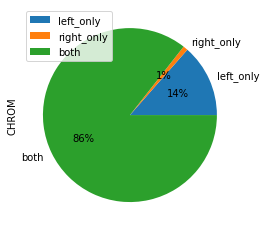

In [ ]:
intersec_full.groupby(['_merge']).count().plot(kind='pie', y='CHROM', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0,1))

#### labeling

In [ ]:
inter = pd.merge(dvf_anno, pt_full, how ='outer', on =['CHROM', 'POS', 'REF', 'ALT'], indicator=True, suffixes=('_dvf','_ptf'))
inter

,CHROM,POS,ID_dv,REF,ALT,QUAL_dvf,FILTER_dvf,FORMAT_dvf,SAMPLEs_dvf,is_homopolymer,ID,QUAL_ptf,FILTER_ptf,FORMAT_ptf,SAMPLEs_ptf,_merge
0,chr1,10352,0.0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,NaN,NaN,NaN,NaN,NaN,left_only
1,chr1,10389,1.0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,NaN,NaN,NaN,NaN,NaN,left_only
2,chr1,13613,2.0,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,NaN,NaN,NaN,NaN,NaN,left_only
3,chr1,13684,3.0,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,NaN,NaN,NaN,NaN,NaN,left_only
4,chr1,13813,4.0,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626273,chr22,50606367,NaN,C,CCCTGCATCTGAGAGCTCCCTCAAGCTTGTGTGG,NaN,NaN,NaN,NaN,NaN,4000295.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:280:0,0:0,0:293",right_only
4626274,chr22,50606370,NaN,AGGGCGGGTGAG,A,NaN,NaN,NaN,NaN,NaN,4000296.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:246:0,0:0,0:290",right_only
4626275,chr22,50612863,NaN,T,TCCCGCCCCTGCCCGGCCTGGCCCCGCCCCTGCCCGGCCTGGC,NaN,NaN,NaN,NaN,NaN,4000305.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:100:26,12:26,12:137",right_only
4626276,chr22,50638414,NaN,T,TAGAGTCCGGACTGACTGTTGACACCTGTCACG,NaN,NaN,NaN,NaN,NaN,4000350.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:315:129,104:24,16:146",right_only


In [ ]:
inter.loc[inter['_merge'] == 'both', 'is_valid'] = True
inter.loc[inter['_merge'] == 'left_only', 'is_valid'] = False
inter

,CHROM,POS,ID_dv,REF,ALT,QUAL_dvf,FILTER_dvf,FORMAT_dvf,SAMPLEs_dvf,is_homopolymer,ID,QUAL_ptf,FILTER_ptf,FORMAT_ptf,SAMPLEs_ptf,_merge,is_valid
0,chr1,10352,0.0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,NaN,NaN,NaN,NaN,NaN,left_only,False
1,chr1,10389,1.0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
2,chr1,13613,2.0,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
3,chr1,13684,3.0,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
4,chr1,13813,4.0,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626273,chr22,50606367,NaN,C,CCCTGCATCTGAGAGCTCCCTCAAGCTTGTGTGG,NaN,NaN,NaN,NaN,NaN,4000295.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:280:0,0:0,0:293",right_only,NaN
4626274,chr22,50606370,NaN,AGGGCGGGTGAG,A,NaN,NaN,NaN,NaN,NaN,4000296.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:246:0,0:0,0:290",right_only,NaN
4626275,chr22,50612863,NaN,T,TCCCGCCCCTGCCCGGCCTGGCCCCGCCCCTGCCCGGCCTGGC,NaN,NaN,NaN,NaN,NaN,4000305.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:100:26,12:26,12:137",right_only,NaN
4626276,chr22,50638414,NaN,T,TAGAGTCCGGACTGACTGTTGACACCTGTCACG,NaN,NaN,NaN,NaN,NaN,4000350.0,50.0,PASS,GT:PS:DP:ADALL:AD:GQ,"0/1:.:315:129,104:24,16:146",right_only,NaN


In [ ]:
inter = inter.drop(inter[inter._merge == 'right_only'].index)
inter

,CHROM,POS,ID_dv,REF,ALT,QUAL_dvf,FILTER_dvf,FORMAT_dvf,SAMPLEs_dvf,is_homopolymer,ID,QUAL_ptf,FILTER_ptf,FORMAT_ptf,SAMPLEs_ptf,_merge,is_valid
0,chr1,10352,0.0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,NaN,NaN,NaN,NaN,NaN,left_only,False
1,chr1,10389,1.0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
2,chr1,13613,2.0,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
3,chr1,13684,3.0,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
4,chr1,13813,4.0,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820.0,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
4584938,chr22,50807905,4584821.0,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
4584939,chr22,50807909,4584822.0,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False,NaN,NaN,NaN,NaN,NaN,left_only,False
4584940,chr22,50807933,4584823.0,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False,NaN,NaN,NaN,NaN,NaN,left_only,False


In [ ]:
4626278 - 4584942

41336

In [ ]:
inter = inter.drop(['ID','QUAL_ptf','FILTER_ptf','FORMAT_ptf','SAMPLEs_ptf','_merge'], axis = 1)
inter

,CHROM,POS,ID_dv,REF,ALT,QUAL_dvf,FILTER_dvf,FORMAT_dvf,SAMPLEs_dvf,is_homopolymer,is_valid
0,chr1,10352,0.0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,False
1,chr1,10389,1.0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,False
2,chr1,13613,2.0,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,False
3,chr1,13684,3.0,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,False
4,chr1,13813,4.0,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,False
...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820.0,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False,False
4584938,chr22,50807905,4584821.0,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False,False
4584939,chr22,50807909,4584822.0,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False,False
4584940,chr22,50807933,4584823.0,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False,False


In [41]:
inter.to_csv('inter.csv', index=False)
!gzip inter.csv
!mv inter.csv.gz /home/skomlev/data/vcf_csv/inter.csv.gz

In [1]:
!gzip -d -k /home/skomlev/data/vcf_csv/inter.csv.gz

In [4]:
inter = pd.read_csv('/home/skomlev/data/vcf_csv/inter.csv')

In [39]:
inter

,CHROM,POS,ID_dv,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs,is_homopolymer,is_valid,is_indel,ref_alt_diff
0,chr1,10352,0.0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,False,True,-1
1,chr1,10389,1.0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,False,True,1
2,chr1,13613,2.0,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,False,False,0
3,chr1,13684,3.0,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,False,False,0
4,chr1,13813,4.0,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820.0,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False,False,False,0
4584938,chr22,50807905,4584821.0,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False,False,False,0
4584939,chr22,50807909,4584822.0,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False,False,False,0
4584940,chr22,50807933,4584823.0,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False,False,False,0


In [40]:
inter['ref_alt_diff'] = abs(inter['REF'].str.len() - inter['ALT'].str.len())
inter

,CHROM,POS,ID_dv,REF,ALT,QUAL,FILTER,FORMAT,SAMPLEs,is_homopolymer,is_valid,is_indel,ref_alt_diff
0,chr1,10352,0.0,T,TA,4.0,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,False,True,1
1,chr1,10389,1.0,AC,A,7.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,False,True,1
2,chr1,13613,2.0,T,A,13.3,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,False,False,0
3,chr1,13684,3.0,C,T,13.8,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,False,False,0
4,chr1,13813,4.0,T,G,11.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820.0,C,G,25.1,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False,False,False,0
4584938,chr22,50807905,4584821.0,T,A,4.2,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False,False,False,0
4584939,chr22,50807909,4584822.0,G,T,4.6,PASS,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False,False,False,0
4584940,chr22,50807933,4584823.0,G,T,5.5,PASS,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False,False,False,0


In [ ]:
inter['is_indel'] = False
inter.loc[inter['REF'].str.len() != inter['ALT'].str.len(), 'is_indel'] = True

In [ ]:
inter.columns = ['CHROM',
 'POS',
 'ID_dv',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'FORMAT',
 'SAMPLEs',
 'is_homopolymer','is_valid','is_indel']

In [ ]:
col_names

['CHROM',
 'POS',
 'ID',
 'REF',
 'ALT',
 'QUAL',
 'FILTER',
 'INFO',
 'FORMAT',
 'SAMPLEs']

In [ ]:
#intersec = pd.merge(pt, dv, how ='inner', on =['CHROM', 'POS', 'REF', 'ALT'])

deepvar(493 586 rows) & platinum (326 207 rows) = 317192 rows inner join intersection

### Extract features

In [42]:
x_df = inter.drop('FILTER', axis=1)
x_df

,CHROM,POS,ID_dv,REF,ALT,QUAL,FORMAT,SAMPLEs,is_homopolymer,is_valid,is_indel,ref_alt_diff
0,chr1,10352,0.0,T,TA,4.0,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,False,True,1
1,chr1,10389,1.0,AC,A,7.2,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,False,True,1
2,chr1,13613,2.0,T,A,13.3,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,False,False,0
3,chr1,13684,3.0,C,T,13.8,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,False,False,0
4,chr1,13813,4.0,T,G,11.6,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820.0,C,G,25.1,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False,False,False,0
4584938,chr22,50807905,4584821.0,T,A,4.2,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False,False,False,0
4584939,chr22,50807909,4584822.0,G,T,4.6,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False,False,False,0
4584940,chr22,50807933,4584823.0,G,T,5.5,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False,False,False,0


In [43]:
x_df[['GT','GQ','DP','AD','VAF','PL']] = x_df['SAMPLEs'].str.split(':',expand=True)
x_df[['AD_ref','AD_alt']] = x_df['AD'].str.split(',',expand=True)
x_df[['PL_0/0','PL_0/1','PL_1/1']] = x_df['PL'].str.split(',',expand=True)
x_df['CHROM_num'] = x_df['CHROM'].str.split('r',expand=True)[1]
x_df

,CHROM,POS,ID_dv,REF,ALT,QUAL,FORMAT,SAMPLEs,is_homopolymer,is_valid,...,DP,AD,VAF,PL,AD_ref,AD_alt,PL_0/0,PL_0/1,PL_1/1,CHROM_num
0,chr1,10352,0.0,T,TA,4.0,GT:GQ:DP:AD:VAF:PL,"1/1:3:6:3,2:0.333333:0,5,0",True,False,...,6,"3,2",0.333333,"0,5,0",3,2,0,5,0,1
1,chr1,10389,1.0,AC,A,7.2,GT:GQ:DP:AD:VAF:PL,"1/1:3:7:4,2:0.285714:4,2,0",False,False,...,7,"4,2",0.285714,"4,2,0",4,2,4,2,0,1
2,chr1,13613,2.0,T,A,13.3,GT:GQ:DP:AD:VAF:PL,"1/1:10:5:0,5:1:12,13,0",False,False,...,5,"0,5",1,"12,13,0",0,5,12,13,0,1
3,chr1,13684,3.0,C,T,13.8,GT:GQ:DP:AD:VAF:PL,"1/1:11:3:0,3:1:13,13,0",False,False,...,3,"0,3",1,"13,13,0",0,3,13,13,0,1
4,chr1,13813,4.0,T,G,11.6,GT:GQ:DP:AD:VAF:PL,"1/1:9:5:0,5:1:11,12,0",False,False,...,5,"0,5",1,"11,12,0",0,5,11,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,chr22,50807889,4584820.0,C,G,25.1,GT:GQ:DP:AD:VAF:PL,"1/1:25:10:0,9:0.9:25,40,0",False,False,...,10,"0,9",0.9,"25,40,0",0,9,25,40,0,22
4584938,chr22,50807905,4584821.0,T,A,4.2,GT:GQ:DP:AD:VAF:PL,"1/1:4:9:2,7:0.777778:2,14,0",False,False,...,9,"2,7",0.777778,"2,14,0",2,7,2,14,0,22
4584939,chr22,50807909,4584822.0,G,T,4.6,GT:GQ:DP:AD:VAF:PL,"1/1:4:10:3,7:0.7:2,16,0",False,False,...,10,"3,7",0.7,"2,16,0",3,7,2,16,0,22
4584940,chr22,50807933,4584823.0,G,T,5.5,GT:GQ:DP:AD:VAF:PL,"0/1:5:13:10,3:0.230769:3,0,11",False,False,...,13,"10,3",0.230769,"3,0,11",10,3,3,0,11,22


In [44]:
len(set(x_df.ID_dv))

4584825

In [45]:
x_df.duplicated('ID_dv') # why?

0          False
1          False
2          False
3          False
4          False
           ...  
4584937    False
4584938    False
4584939    False
4584940    False
4584941    False
Length: 4584942, dtype: bool

In [46]:
set(x_df['GT'])

{'0/1', '1/1'}

In [47]:
cols_for_model = ['CHROM_num','POS','QUAL','GQ','DP','AD_ref','AD_alt','VAF','PL_0/0','PL_0/1','PL_1/1','is_homopolymer',
                  'is_indel','ref_alt_diff','is_valid']

In [48]:
x_df = x_df[cols_for_model]
x_df

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,True,True,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,False,True,1,False
2,1,13613,13.3,10,5,0,5,1,12,13,0,False,False,0,False
3,1,13684,13.8,11,3,0,3,1,13,13,0,False,False,0,False
4,1,13813,11.6,9,5,0,5,1,11,12,0,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.9,25,40,0,False,False,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,False,False,0,False
4584939,22,50807909,4.6,4,10,3,7,0.7,2,16,0,False,False,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,False,False,0,False


In [49]:
x_df.dtypes

CHROM_num          object
POS                 int64
QUAL              float64
GQ                 object
DP                 object
AD_ref             object
AD_alt             object
VAF                object
PL_0/0             object
PL_0/1             object
PL_1/1             object
is_homopolymer       bool
is_indel             bool
ref_alt_diff        int64
is_valid             bool
dtype: object

In [50]:
vcf_dtypes = {'CHROM_num': 'int32',
              'GQ': 'int32',
              'DP': 'int32',
              'AD_ref': 'int32',
              'AD_alt': 'int32',
              'VAF': 'float64',
              'PL_0/0': 'int32',
              'PL_0/1': 'int32',
              'PL_1/1': 'int32'}

In [51]:
x_df = x_df.astype(vcf_dtypes)

In [52]:
x_df

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,True,True,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,False,True,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,False,False,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,False,False,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,False,False,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,False,False,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,False,False,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,False,False,0,False


In [53]:
x_df.to_csv('X_full_homo-anno_indel-len.csv', index=False)

In [54]:
!gzip X_full_homo-anno_indel-len.csv

In [55]:
!mv X_full_homo-anno_indel-len.csv.gz /home/skomlev/data/vcf_csv/

# Exploratory data analysis

In [46]:
x_df = X

In [47]:
corr_matrix = x_df.corr(method='spearman')
corr_matrix

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,ref_alt_diff,is_valid
CHROM_num,1.000000,-0.406683,-0.018363,-0.018079,0.004121,0.007838,-0.005126,-0.006415,-0.018361,-0.009847,-0.005901,0.008172,0.006684,0.006834,-0.048043
POS,-0.406683,1.000000,0.024407,0.023400,0.003365,-0.002472,0.009173,0.001874,0.024400,0.004121,0.012258,0.003500,0.008753,0.008672,0.052240
QUAL,-0.018363,0.024407,1.000000,0.968680,0.194599,-0.607540,0.740413,0.691959,0.999616,0.740123,-0.437498,-0.068944,-0.080527,-0.085778,0.352105
GQ,-0.018079,0.023400,0.968680,1.000000,0.245317,-0.529526,0.705570,0.620008,0.968340,0.691560,-0.336865,-0.158963,-0.155058,-0.157854,0.396661
DP,0.004121,0.003365,0.194599,0.245317,1.000000,0.310171,0.540512,-0.021614,0.194746,0.047371,0.093335,-0.036690,-0.066429,-0.070474,0.215683
AD_ref,0.007838,-0.002472,-0.607540,-0.529526,0.310171,1.000000,-0.561733,-0.894580,-0.607230,-0.838879,0.806480,-0.017070,-0.014209,-0.014203,0.051106
AD_alt,-0.005126,0.009173,0.740413,0.705570,0.540512,-0.561733,1.000000,0.767147,0.740349,0.744521,-0.593770,-0.002298,-0.043376,-0.049668,0.196218
VAF,-0.006415,0.001874,0.691959,0.620008,-0.021614,-0.894580,0.767147,1.000000,0.691628,0.836838,-0.769072,-0.006323,-0.040823,-0.044967,0.026429
PL_0/0,-0.018361,0.024400,0.999616,0.968340,0.194746,-0.607230,0.740349,0.691628,1.000000,0.739945,-0.437325,-0.069118,-0.080739,-0.086004,0.352469
PL_0/1,-0.009847,0.004121,0.740123,0.691560,0.047371,-0.838879,0.744521,0.836838,0.739945,1.000000,-0.837326,-0.060853,-0.075992,-0.077508,0.068771


In [22]:
corr_matrix.unstack()

CHROM_num  CHROM_num         1.000000
           POS              -0.406683
           QUAL             -0.018363
           GQ               -0.018079
           DP                0.004121
                               ...   
is_valid   PL_1/1            0.173466
           is_homopolymer   -0.297599
           is_indel         -0.272547
           ref_alt_diff     -0.273769
           is_valid          1.000000
Length: 225, dtype: float64

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

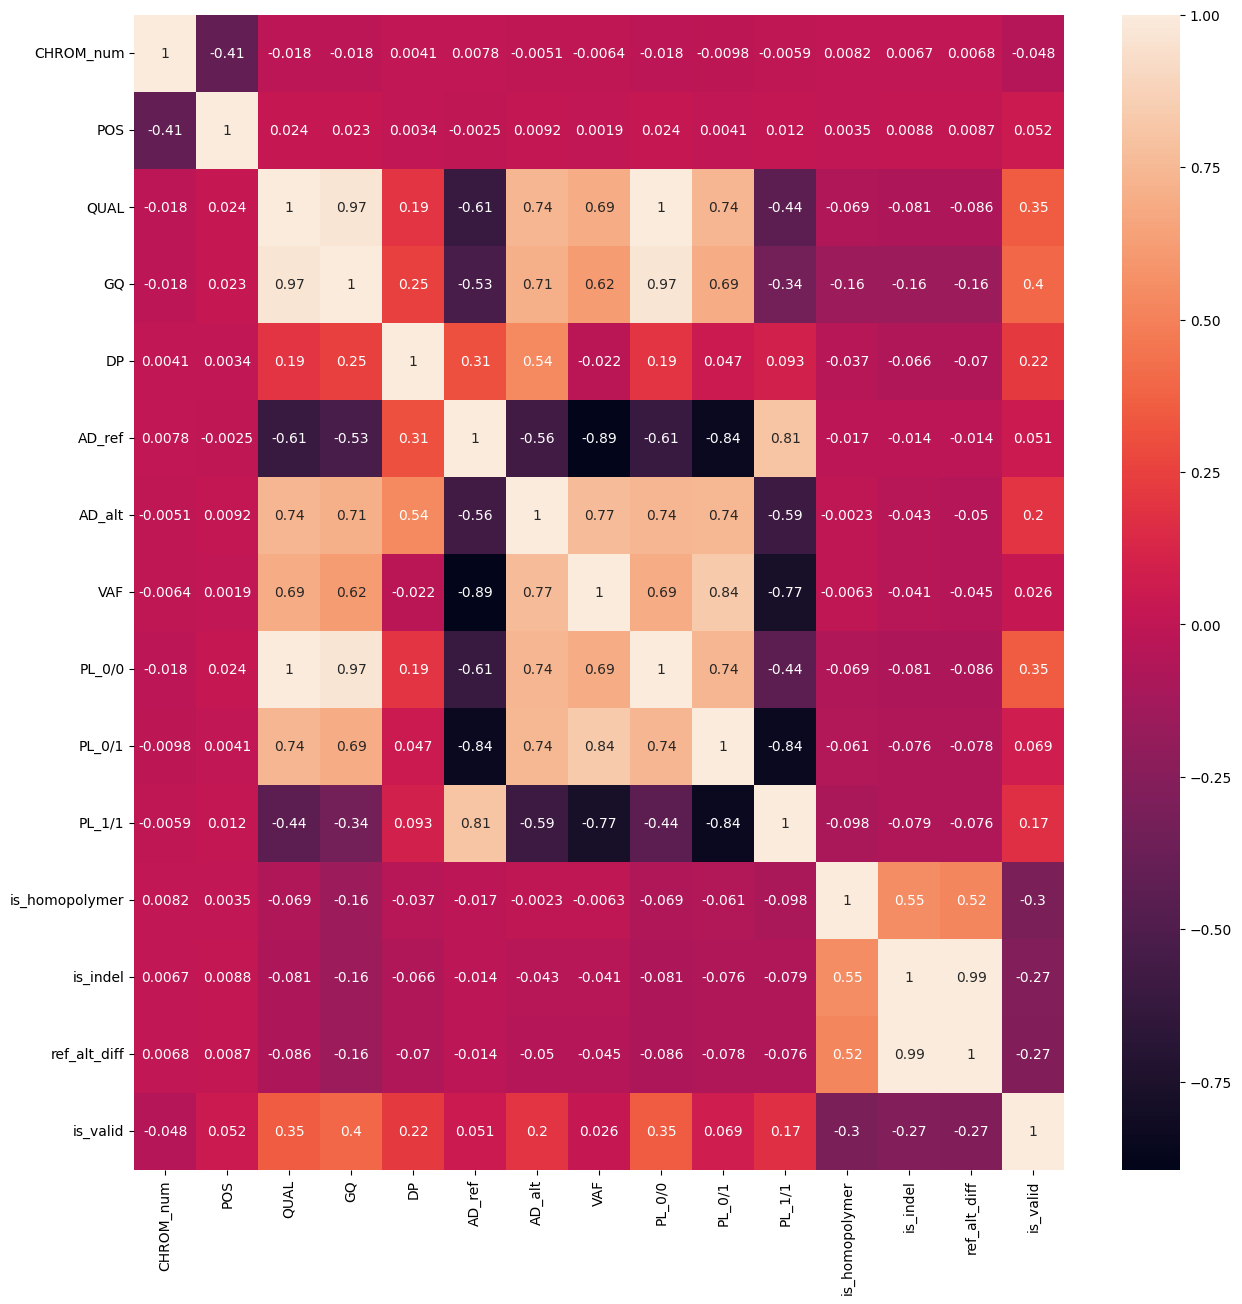

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, ax=ax)
fig.savefig('params_corr_plot')
plt.show()

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df, method: str = 'spearman'):
    au_corr = df.corr(method = method).unstack()
    #labels_to_drop = get_redundant_pairs(df)
    #print(labels_to_drop)
    au_corr = au_corr.sort_values(ascending=False)#.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

In [24]:
corrplot = get_correlations(x_df)
corrplot

CHROM_num       CHROM_num         1.000000
POS             POS               1.000000
ref_alt_diff    ref_alt_diff      1.000000
is_indel        is_indel          1.000000
is_homopolymer  is_homopolymer    1.000000
                                    ...   
PL_1/1          PL_0/1           -0.837326
PL_0/1          AD_ref           -0.838879
AD_ref          PL_0/1           -0.838879
VAF             AD_ref           -0.894580
AD_ref          VAF              -0.894580
Length: 225, dtype: float64

In [19]:
print(corrplot.to_string())

QUAL            PL_0/0            0.999616
is_indel        ref_alt_diff      0.994717
QUAL            GQ                0.968680
GQ              PL_0/0            0.968340
VAF             PL_0/1            0.836838
AD_ref          PL_1/1            0.806480
AD_alt          VAF               0.767147
                PL_0/1            0.744521
QUAL            AD_alt            0.740413
AD_alt          PL_0/0            0.740349
QUAL            PL_0/1            0.740123
PL_0/0          PL_0/1            0.739945
GQ              AD_alt            0.705570
QUAL            VAF               0.691959
VAF             PL_0/0            0.691628
GQ              PL_0/1            0.691560
                VAF               0.620008
is_homopolymer  is_indel          0.551273
DP              AD_alt            0.540512
is_homopolymer  ref_alt_diff      0.519264
GQ              is_valid          0.396661
PL_0/0          is_valid          0.352469
QUAL            is_valid          0.352105
DP         

In [15]:
for item in corrplot:
    print(item.)

0.9996158456830474
0.9947169554232088
0.9686796078755051
0.9683399700559872
0.836838164624992
0.8064803145371617
0.7671468278759859
0.7445208040067665
0.7404132056587517
0.7403485488983992
0.7401232876685755
0.7399450568895873
0.705570315101322
0.691959413932413
0.6916280886999241
0.6915600596641756
0.6200082002276488
0.5512728313497245
0.5405124225657304
0.5192644105356842
0.39666078812386885
0.352468631968556
0.3521047711889744
0.3101711211854508
0.245316503306511
0.21568253503909754
0.19621848832956146
0.1947459947875274
0.1945989073931917
0.1734663014470415
0.0933347947418324
0.0687708751520876
0.052239502980738664
0.05110558928394901
0.04737127110287744
0.026429391876931333
0.02440667298929048
0.02439972425487836
0.023400365388821003
0.01225844537927491
0.009173133217832488
0.008753082000033144
0.00867152455560379
0.008172302994460357
0.00783802039388364
0.006833790623116211
0.006683544233619498
0.004121413966240046
0.0041207385479470025
0.003499575704882567
0.0033649336606810377


In [25]:
corrplot['is_valid']

is_valid          1.000000
GQ                0.396661
PL_0/0            0.352469
QUAL              0.352105
DP                0.215683
AD_alt            0.196218
PL_1/1            0.173466
PL_0/1            0.068771
POS               0.052240
AD_ref            0.051106
VAF               0.026429
CHROM_num        -0.048043
is_indel         -0.272547
ref_alt_diff     -0.273769
is_homopolymer   -0.297599
dtype: float64

<Axes: >

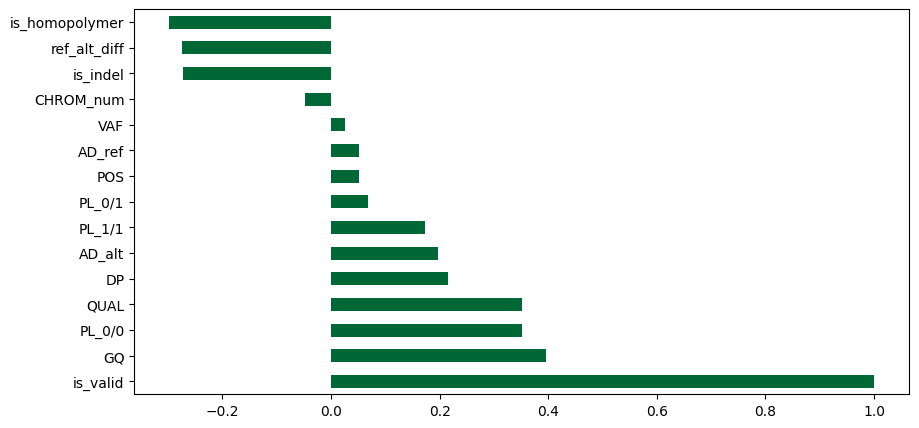

In [26]:
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

fig, ax = plt.subplots(figsize=(10,5))

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

corrplot['is_valid'].plot.barh(color=colors)

# Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib.colors import Colormap, ListedColormap

import numpy as np
import pandas as pd

In [10]:
#local
x_df = X
x_df

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,True,True,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,False,True,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,False,False,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,False,False,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,False,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,False,False,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,False,False,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,False,False,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,False,False,0,False


### old

In [ ]:
#colab
x_df = pd.read_csv('/content/X_full_homo-annotated.csv')
x_df

NameError: name 'plt' is not defined

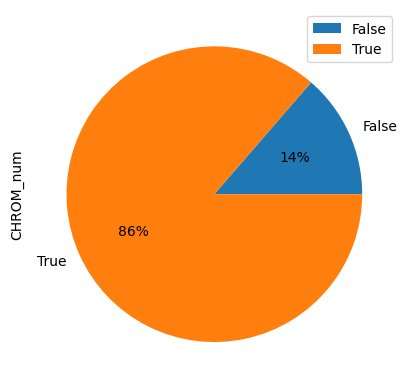

In [16]:
x_df.groupby(['is_valid']).count().plot(kind='pie', y='CHROM_num', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(0,1))

In [17]:
base_precision = 317192 / (176394 + 317192)
base_precision

0.6426276272017439

### Train/Test split

In [11]:
#feature_names = cols_for_model.copy()
feature_names = list(x_df.columns)
feature_names.remove('is_valid')
feature_names

['CHROM_num',
 'POS',
 'QUAL',
 'GQ',
 'DP',
 'AD_ref',
 'AD_alt',
 'VAF',
 'PL_0/0',
 'PL_0/1',
 'PL_1/1',
 'is_homopolymer',
 'is_indel',
 'ref_alt_diff']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_df[feature_names], x_df['is_valid'], test_size=0.3, random_state=42)

In [61]:
X_train

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,ref_alt_diff
890294,3,98120925,60.6,57,28,0,28,1.000000,60,59,0,False,False,0
3102804,11,109528772,34.2,34,36,21,15,0.416667,34,0,70,False,False,0
1820895,6,77492595,51.7,52,46,25,21,0.456522,51,0,66,False,False,0
1220032,4,99666218,21.5,21,34,25,9,0.264706,21,0,50,False,False,0
2023754,7,29984433,48.0,48,35,15,20,0.571429,47,0,59,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136074,4,49135974,13.2,13,77,5,66,0.857143,12,25,0,False,False,0
1570006,5,117705756,52.7,41,18,0,17,0.944444,52,40,0,False,False,0
2234489,8,2380271,13.5,13,55,31,24,0.436364,13,0,25,False,False,0
4304572,19,37224802,47.2,47,45,30,14,0.311111,47,0,66,True,True,1


In [94]:
X_train_no_anno = X_train.drop('is_homopolymer', axis=1)
X_test_no_anno = X_test.drop('is_homopolymer', axis=1)
X_train_no_anno

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_indel
890294,3,98120925,60.6,57,28,0,28,1.000000,60,59,0,False
3102804,11,109528772,34.2,34,36,21,15,0.416667,34,0,70,False
1820895,6,77492595,51.7,52,46,25,21,0.456522,51,0,66,False
1220032,4,99666218,21.5,21,34,25,9,0.264706,21,0,50,False
2023754,7,29984433,48.0,48,35,15,20,0.571429,47,0,59,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1136074,4,49135974,13.2,13,77,5,66,0.857143,12,25,0,False
1570006,5,117705756,52.7,41,18,0,17,0.944444,52,40,0,False
2234489,8,2380271,13.5,13,55,31,24,0.436364,13,0,25,False
4304572,19,37224802,47.2,47,45,30,14,0.311111,47,0,66,True


### Modeling

In [12]:
from joblib import dump, load
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [28]:
def save_sklearn_model(model, out_path: str, gzip = True):
    pickle.dump(model, open(out_path, 'wb'))
    !gzip $out_path

In [13]:
models_dir = '/home/skomlev/models'

In [135]:
X4 = x_df.drop(['is_homopolymer','is_indel'], axis=1)
X4

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,0,False


In [136]:
features4 = list(X4.columns)
features4.remove('is_valid')
features4

['CHROM_num',
 'POS',
 'QUAL',
 'GQ',
 'DP',
 'AD_ref',
 'AD_alt',
 'VAF',
 'PL_0/0',
 'PL_0/1',
 'PL_1/1',
 'ref_alt_diff']

In [137]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4[features4], X4['is_valid'], 
                                                    test_size=0.3, random_state=42)

In [138]:
X4_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
958466,3,141216875,33.1,33,42,26,16,0.380952,33,0,59,0
597011,2,158692713,36.3,36,44,19,25,0.568182,36,0,58,0
192660,1,123192970,5.7,3,5,3,2,0.400000,2,3,0,0
4290213,19,28764417,50.9,51,43,27,16,0.372093,50,0,66,0
2272738,8,14544702,38.5,39,36,19,17,0.472222,38,0,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2857231,10,102788013,50.6,47,28,0,27,0.964286,50,50,0,0
2612440,9,101301658,44.6,45,26,10,16,0.615385,44,0,61,0
542594,2,120366941,51.2,51,26,13,13,0.500000,51,0,99,0
698680,2,224534796,54.5,54,34,0,34,1.000000,54,61,0,0


In [17]:
#X4.to_csv('X4.csv', index=False)

#### Decision Tree

In [33]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [34]:
tree4 = DecisionTreeClassifier(random_state=42)
tree4.fit(X4_train, y4_train)

DecisionTreeClassifier(random_state=42)

In [35]:
tree_pred = tree4.predict(X4_test)

In [36]:
ce_tree4 = ClassEvaluation(X4_test, y4_test, tree4)

In [38]:
ce_tree4.calculate_metrics(mutation_type_filter='het_indel')

{'f1_score_het_indel': 0.7852,
 'precision_het_indel': 0.7879,
 'recall_het_indel': 0.7825}

In [85]:
precision_score(y4_test, tree_pred)

0.9409560821966522

In [86]:
recall_score(y4_test, tree_pred)

0.9354837080453442

In [87]:
f1_score(y4_test, tree_pred)

0.9382119154141598

In [89]:
roc_auc_score(y4_test, tree_pred)

0.7817858210847081

In [91]:
print(classification_report(y4_test, tree_pred))

              precision    recall  f1-score   support

       False       0.61      0.63      0.62    187504
        True       0.94      0.94      0.94   1187979

    accuracy                           0.89   1375483
   macro avg       0.77      0.78      0.78   1375483
weighted avg       0.90      0.89      0.89   1375483



In [98]:
from sklearn.tree import plot_tree # tree diagram

In [100]:
X4['is_valid'].unique().str.tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'str'

In [ ]:
4

In [ ]:
feature_names = X4.columns[:-1]
target_names = ['false','true']

plot_tree(tree4, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [ ]:
#plot_surface(def_tree, X_test, y_test)

In [ ]:
def_tree.tree_.threshold

In [20]:
#tree.export_text(def_tree)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(def_tree,
                   filled=True)

In [ ]:
tree.plot_tree(def_tree)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
tree.export_text(clf)

#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

##### other

In [62]:
forest_def_indel_len = RandomForestClassifier() 
forest_def_indel_len = forest_def_indel_len.fit(X_train.drop('is_indel',axis=1), y_train)

In [66]:
forest_indel_pred =  forest_def_indel_len.predict(X_test.drop('is_indel',axis=1))

In [68]:
roc_auc_score(y_test, forest_indel_pred)

0.8074693861302465

In [71]:
f1_score(y_test, forest_indel_pred)

0.9596981212122216

In [71]:
#!gzip -d -k /home/skomlev/data/models/forest_def.sav.gz

In [70]:
forest = pickle.load(open('/home/skomlev/data/models/forest_def.sav', 'rb'))
forest

/home/skomlev/.local/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/skomlev/.local/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


RandomForestClassifier(max_features='auto')

In [ ]:
forest_no_anno = RandomForestClassifier() 
forest_no_anno = forest_no_anno.fit(X_train_no_anno, y_train)

In [ ]:
forest = RandomForestClassifier() 
forest = forest.fit(X_train, y_train)

In [97]:
forest.feature_importances_

array([0.06338267, 0.125903  , 0.17929101, 0.14707959, 0.07673737,
       0.0332802 , 0.05176897, 0.04972031, 0.1080011 , 0.02739152,
       0.06570215, 0.04499456, 0.02674754])

In [73]:
pred = forest.predict(X_test)

In [98]:
pred_no_anno = forest_no_anno.predict(X_test_no_anno)

In [74]:
roc_auc_score(y_test, pred)

0.8045142997292124

In [72]:
forest.feature_names_in_

array(['CHROM_num', 'POS', 'QUAL', 'GQ', 'DP', 'AD_ref', 'AD_alt', 'VAF',
       'PL_0/0', 'PL_0/1', 'PL_1/1', 'is_homopolymer', 'is_indel'],
      dtype=object)

In [ ]:
# save the model to disk
filename = 'forest_def.sav'
pickle.dump(forest, open(filename, 'wb'))

In [ ]:
!gzip -k forest_def.sav

In [ ]:
models_dir = '/content/drive/MyDrive/BTC/data/models'

In [ ]:
!cp forest_def.sav.gz $models_dir/

##### Forest_4: No annotation & with ref_alt_diff

In [60]:
from joblib import load
import pickle

In [61]:
model_path = '/home/skomlev/models/forest4.sav'

In [62]:
forest4 = pickle.load(open(model_path, 'rb'))
forest4

RandomForestClassifier()

In [40]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4[features4], X4['is_valid'], 
                                                    test_size=0.3, random_state=1)

In [41]:
X4_train

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
4517053,21,46041340,58.7,55,29,0,29,1.000000,58,57,0,0
1056525,4,5717652,56.0,55,41,0,41,1.000000,55,63,0,0
2523008,9,25068003,42.7,43,24,11,13,0.541667,42,0,60,2
1674105,6,2474640,43.6,44,30,16,14,0.466667,43,0,73,0
3861623,16,10297443,37.6,38,37,17,20,0.540541,37,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1166159,4,66373575,36.7,37,24,13,11,0.458333,36,0,66,0
4267653,19,15958986,44.6,44,38,14,24,0.631579,44,0,57,1
491263,2,79288828,61.6,56,29,0,29,1.000000,61,56,0,0
3937352,16,75374178,61.4,59,38,0,38,1.000000,61,62,0,0


In [24]:
forest4 = RandomForestClassifier() 
forest4 = forest4.fit(X4_train, y4_train)

In [42]:
forest4

NameError: name 'forest4' is not defined

In [33]:
save_sklearn_model(forest4, models_dir + '/forest4.sav')

In [67]:
ce4 = ClassEvaluation(X4_test, y4_test, forest4)
ce4.full_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid,prediction
958466,3,141216875,33.1,33,42,26,16,0.380952,33,0,59,0,True,True
597011,2,158692713,36.3,36,44,19,25,0.568182,36,0,58,0,True,True
192660,1,123192970,5.7,3,5,3,2,0.400000,2,3,0,0,False,False
4290213,19,28764417,50.9,51,43,27,16,0.372093,50,0,66,0,True,True
2272738,8,14544702,38.5,39,36,19,17,0.472222,38,0,65,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857231,10,102788013,50.6,47,28,0,27,0.964286,50,50,0,0,True,True
2612440,9,101301658,44.6,45,26,10,16,0.615385,44,0,61,0,True,True
542594,2,120366941,51.2,51,26,13,13,0.500000,51,0,99,0,True,True
698680,2,224534796,54.5,54,34,0,34,1.000000,54,61,0,0,True,True


In [68]:
ce4.calculate_metrics()

{'f1_score_full': 0.958, 'precision_full': 0.942, 'recall_full': 0.974}

In [81]:
ce4.calculate_metrics(mutation_type_filter='het_indel')

{'f1_score_het_indel': 0.854,
 'precision_het_indel': 0.833,
 'recall_het_indel': 0.877}

In [72]:
ce4.calculate_metrics(mutation_type_filter='homo_indel')

{'f1_score_homo_indel': 0.972,
 'precision_homo_indel': 0.959,
 'recall_homo_indel': 0.985}

#### XGB

In [40]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
xgb4 = make_pipeline(StandardScaler(), xgb.XGBClassifier())
xgb4.fit(X4_train, y4_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [52]:
xgb4

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [64]:
xgb4_no_scale = xgb.XGBClassifier()
xgb4_no_scale.fit(X4_train, y4_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
xgb_pred = xgb4.predict(X4_test)

In [54]:
roc_auc_score(y4_test, xgb_pred)

0.8085682846970219

In [55]:
precision_score(y4_test, xgb_pred)

0.9450109593770254

In [56]:
recall_score(y4_test, xgb_pred)

0.977084764483237

In [57]:
f1_score(y4_test, xgb_pred)

0.9607802558579619

In [58]:
ce_xgb4 = ClassEvaluation(X4_test, y4_test, xgb4)

In [59]:
ce_xgb4.calculate_metrics(mutation_type_filter='het_indel')

{'f1_score_het_indel': 0.8587,
 'precision_het_indel': 0.8343,
 'recall_het_indel': 0.8846}

In [60]:
ce_xgb4.calculate_metrics(mutation_type_filter='homo_indel')

{'f1_score_homo_indel': 0.9751,
 'precision_homo_indel': 0.9618,
 'recall_homo_indel': 0.9887}

In [61]:
ce_xgb4.calculate_metrics()

{'f1_score_full': 0.9608, 'precision_full': 0.945, 'recall_full': 0.9771}

In [28]:
ce_xgb4_no_scale = ClassEvaluation(X4_test, y4_test, xgb4_no_scale)

In [29]:
ce_xgb4_no_scale.calculate_metrics(mutation_type_filter='het_indel')

{'f1_score_het_indel': 0.8595,
 'precision_het_indel': 0.8376,
 'recall_het_indel': 0.8827}

##### Inside XGB model

In [65]:
xgb4_no_scale.get_split_value_histogram("POS")

AttributeError: 'XGBClassifier' object has no attribute 'get_split_value_histogram'

In [ ]:
xgb4_no_scale.get_num_boosting_rounds()

100

In [74]:
booster4 = xgb4_no_scale.get_booster()

In [79]:
booster4.get_split_value_histogram("POS")

,SplitValue,Count
0,1.831703e+05,46.0
1,3.435495e+05,32.0
2,5.039288e+05,25.0
3,6.643080e+05,13.0
4,8.246873e+05,13.0
...,...,...
604,2.479691e+08,8.0
605,2.482899e+08,1.0
606,2.484502e+08,10.0
607,2.486106e+08,6.0


In [81]:
tdf4 = booster4.trees_to_dataframe()
tdf4

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,GQ,27.000000,0-1,0-2,0-1,478340.125000,802364.750000,NaN
1,0,1,0-1,PL_1/1,44.000000,0-3,0-4,0-3,34304.371100,78544.500000,NaN
2,0,2,0-2,ref_alt_diff,1.000000,0-5,0-6,0-5,52281.000000,723820.250000,NaN
3,0,3,0-3,PL_0/0,20.000000,0-7,0-8,0-7,8257.890620,66731.250000,NaN
4,0,4,0-4,VAF,0.351601,0-9,0-10,0-9,3789.184570,11813.250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10967,99,114,99-114,Leaf,NaN,NaN,NaN,NaN,-0.129463,515.312195,NaN
10968,99,115,99-115,Leaf,NaN,NaN,NaN,NaN,0.030669,367.929260,NaN
10969,99,116,99-116,Leaf,NaN,NaN,NaN,NaN,-0.082520,327.370972,NaN
10970,99,117,99-117,Leaf,NaN,NaN,NaN,NaN,0.063824,385.474060,NaN


In [82]:
tdf4[tdf4['Feature'] == 'POS']

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
52,0,52,0-52,POS,426269.0,0-105,0-106,0-105,1037.625000,580268.750000,NaN
53,0,53,0-53,POS,46651796.0,0-107,0-108,0-107,92.822510,204.250000,NaN
177,1,50,1-50,POS,2161016.0,1-101,1-102,1-101,22.618164,5218.078120,NaN
180,1,53,1-53,POS,30143024.0,1-107,1-108,1-107,102.313347,249.048035,NaN
294,2,40,2-40,POS,50755108.0,2-81,2-82,2-81,29.701653,133.844879,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10911,99,58,99-58,POS,61108128.0,99-109,99-110,99-109,57.140141,434.066681,NaN
10912,99,59,99-59,POS,40288896.0,99-111,99-112,99-111,13.399836,208.947784,NaN
10913,99,60,99-60,POS,41856580.0,99-113,99-114,99-113,154.088013,559.255310,NaN
10914,99,61,99-61,POS,46554416.0,99-115,99-116,99-115,24.726008,695.300232,NaN


In [87]:
booster4

In [18]:
'''
# plot decision tree
from xgboost import plot_tree
import matplotlib.pyplot as plt

# plot single tree
plot_tree(xgb4_no_scale)
plt.show()
'''

'\n# plot decision tree\nfrom xgboost import plot_tree\nimport matplotlib.pyplot as plt\n\n# plot single tree\nplot_tree(xgb4_no_scale)\nplt.show()\n'

##### Save/Load XGB model

In [19]:
import pickle

In [20]:
# save the model to disk
filename = 'xgb_4_no_scale.sav'
pickle.dump(xgb4_no_scale, open(filename, 'wb'))

NameError: name 'xgb4_no_scale' is not defined

In [27]:
PATH_xgb4_no_scale = '/home/skomlev/models/xgb_4_no_scale.sav'

In [24]:
# load the model from disk
loaded_model = pickle.load(open(PATH_xgb4_no_scale, 'rb'))
#result = loaded_model.predict(X_test)

In [25]:
#f1_score(y_test, result)

In [58]:
loaded_model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

##### Hyperopt

In [117]:
X4_mini = X4.sample(frac=0.05, random_state=1)
X4_mini

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid
3724288,15,34212396,53.6,53,49,18,31,0.632653,53,0,65,0,True
1243739,4,115788034,61.9,60,36,0,36,1.000000,61,63,0,0,True
3423801,13,42972288,35.2,35,32,20,12,0.375000,35,0,59,0,True
1786116,6,55096300,34.2,34,25,15,10,0.400000,34,0,62,0,True
879182,3,90172768,34.2,32,29,16,13,0.448276,34,0,36,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700860,10,12560540,48.1,48,39,20,19,0.487179,48,0,63,0,True
2773554,10,52612545,52.0,52,34,17,17,0.500000,52,0,68,0,True
2285109,8,19190528,47.7,46,31,0,29,0.935484,47,49,0,2,True
3717443,15,30377333,24.6,19,4,0,4,1.000000,24,19,0,0,True


In [118]:
len(X4_mini) / len(X4)

0.04999997818947328

In [119]:
len(X4)

4584942

In [133]:
from sklearn.model_selection import train_test_split

# Separate the test data
x_train, x_val_test, y_train, y_val_test = train_test_split(X4_mini[features4], X4_mini['is_valid'], test_size=0.3, shuffle=True, random_state=42)

# Split the remaining data to train and validation
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, shuffle=True, random_state=42)

In [134]:
x_val

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
2376342,8,84248386,52.5,52,49,20,29,0.591837,52,0,65,0
2068993,7,56193726,30.1,30,26,17,9,0.346154,30,0,60,0
3227363,12,44600104,39.1,39,34,14,20,0.588235,39,0,50,0
4445008,20,62399548,45.5,45,32,18,12,0.375000,45,0,54,1
370502,2,2537003,63.4,63,28,0,28,1.000000,63,76,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1293481,4,144285715,42.1,42,28,15,13,0.464286,42,0,67,0
2969249,11,26528532,63.5,60,26,0,26,1.000000,63,62,0,0
1619190,5,151571050,44.5,44,34,17,17,0.500000,44,0,99,0
4044915,17,46151253,10.9,11,58,39,19,0.327586,10,0,42,0


In [31]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
space = {'max_depth': hp.quniform("max_depth", 20, 150, 5),
        'gamma': hp.uniform ('gamma', 5,25),
        'reg_alpha' : hp.uniform('reg_alpha', 0,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 2),
        'n_estimators': hp.quniform('n_estimators', 150,250,5)}

Code sourse: https://medium.com/analytics-vidhya/hyperparameter-tuning-hyperopt-bayesian-optimization-for-xgboost-and-neural-network-8aedf278a1c9

In [60]:
space={'max_depth': hp.quniform("max_depth", 3, 30, 3),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.uniform('reg_alpha', 0,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 2),
        'n_estimators': hp.quniform('n_estimators', 100,300,10)
    }

In [96]:
best

{'colsample_bytree': 0.5312181179708289,
 'gamma': 8.807109881275668,
 'max_depth': 30,
 'min_child_weight': 0,
 'n_estimators': 190,
 'reg_alpha': 0.31790397234050655,
 'reg_lambda': 0.007555691694515643}

In [123]:
space2={'max_depth': hp.quniform("max_depth", 20, 150, 5),
        'gamma': hp.uniform ('gamma', 5,25),
        'n_estimators': hp.quniform('n_estimators', 150,250,5)
    }

In [106]:
# Classifier:
def hyperparameter_tuning(space):
    model = xgb.XGBClassifier(max_depth = int(space['max_depth']),
                              gamma = space['gamma'],
                              reg_alpha = space['reg_alpha'],
                              reg_lambda = space['reg_alpha'],
                              colsample_bytree=space['colsample_bytree'],
                              min_child_weight=int(space['min_child_weight']),
                              n_estimators = int(space['n_estimators']))

    #evaluation = [( x_train, y_train), ( x_val, y_val)]
    
    model.fit(x_train, y_train)#,eval_set=(x_val, y_val), eval_metric="auc",early_stopping_rounds=10,verbose=False)'''

    pred = model.predict(x_val)
    auc = roc_auc_score(y_val, pred)
    print ("ROC-AUC:", auc)
    #change the metric if you like
    return {'loss': -auc, 'status': STATUS_OK, 'model': model}

In [124]:
# Classifier:
def hyperparameter_tuning2(space2):
    model = xgb.XGBClassifier(max_depth = int(space2['max_depth']),
                              gamma = space2['gamma'],
                              reg_alpha = best['reg_alpha'],
                              reg_lambda = best['reg_alpha'],
                              colsample_bytree=best['colsample_bytree'],
                              min_child_weight=int(best['min_child_weight']),
                              n_estimators = int(space2['n_estimators']))

    evaluation = [( x_train, y_train), ( x_val, y_val)]
    
    model.fit(x_train, y_train)#, eval_set=evaluation, eval_metric="auc",early_stopping_rounds=10,verbose=False)

    pred = model.predict(x_val)
    auc = roc_auc_score(y_val, pred)
    print("ROC-AUC:", auc)
    print('Params:', {k: v for k, v in model.get_xgb_params().items() if v is not None})
    print('===========================================================================')
    #change the metric if you like
    return {'loss': -auc, 'status': STATUS_OK, 'model': model}

In [109]:
3

3

In [127]:
x_train

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
4543467,22,26344121,35.1,35,38,20,18,0.473684,35,0,58,0
1856730,6,101154753,39.6,33,27,3,24,0.888889,39,34,0,1
2922720,11,4833646,46.9,47,38,15,23,0.605263,46,0,99,0
4057036,17,53739772,60.5,56,41,0,41,1.000000,60,57,0,0
3403257,13,30664409,33.3,33,23,13,10,0.434783,33,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3218172,12,38364033,61.8,61,33,0,33,1.000000,61,67,0,0
2055630,7,49395703,37.1,37,47,23,24,0.510638,37,0,60,0
1370081,4,186528131,37.0,37,24,10,14,0.583333,36,0,61,0
1371023,4,186929904,11.1,11,17,13,4,0.235294,10,0,26,0


In [125]:
trials2 = Trials()
best2 = fmin(fn=hyperparameter_tuning2,
            space=space2,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials2)

print(best2)

ROC-AUC:                                                                                                                                                           
0.8005483842430333                                                                                                                                                 
Params:                                                                                                                                                            
{'objective': 'binary:logistic', 'colsample_bytree': 0.5312181179708289, 'gamma': 24.474351077959472, 'max_depth': 90, 'min_child_weight': 0, 'reg_alpha': 0.31790397234050655, 'reg_lambda': 0.31790397234050655}
ROC-AUC:                                                                                                                                                           
0.8007227538638361                                                                                                                   

In [74]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

ROC-AUC:                                                                                                                                                           
0.8038869708678681                                                                                                                                                 
ROC-AUC:                                                                                                                                                           
0.8081066102225094                                                                                                                                                 
ROC-AUC:                                                                                                                                                           
0.8041083895393037                                                                                                                                                 
ROC-AUC:        

In [128]:
best2

{'gamma': 9.876953756752373, 'max_depth': 120.0, 'n_estimators': 245.0}

100/100 [4:01:57<00:00, 145.18s/trial, best loss: -0.810204899877674]
{'colsample_bytree': 0.5312181179708289, 'gamma': 8.807109881275668, 'max_depth': 30.0, 'min_child_weight': 0.0, 'n_estimators': 190.0, 'reg_alpha': 0.31790397234050655, 'reg_lambda': 0.007555691694515643}

In [88]:
best

{'colsample_bytree': 0.5312181179708289,
 'gamma': 8.807109881275668,
 'max_depth': 30,
 'min_child_weight': 0,
 'n_estimators': 190,
 'reg_alpha': 0.31790397234050655,
 'reg_lambda': 0.007555691694515643}

In [151]:
best_paprms = {
    'colsample_bytree': 0.5312181179708289,
    'gamma': 9.876953756752373,
    'max_depth': int(120),
    'min_child_weight': int(0),
    'n_estimators': int(245),
    'reg_alpha': 0.31790397234050655,
    'reg_lambda': 0.007555691694515643
}

In [152]:
best_paprms

{'colsample_bytree': 0.5312181179708289,
 'gamma': 9.876953756752373,
 'max_depth': 120,
 'min_child_weight': 0,
 'n_estimators': 245,
 'reg_alpha': 0.31790397234050655,
 'reg_lambda': 0.007555691694515643}

In [153]:
[type(k) for k in best_paprms.values()]

[float, float, int, int, int, float, float]

In [87]:
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['n_estimators'] = int(best['n_estimators'])

In [148]:
xgb_opt2 = xgb.XGBClassifier(**best_paprms)

In [149]:
X4_train

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
890294,3,98120925,60.6,57,28,0,28,1.000000,60,59,0,0
3102804,11,109528772,34.2,34,36,21,15,0.416667,34,0,70,0
1820895,6,77492595,51.7,52,46,25,21,0.456522,51,0,66,0
1220032,4,99666218,21.5,21,34,25,9,0.264706,21,0,50,0
2023754,7,29984433,48.0,48,35,15,20,0.571429,47,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1136074,4,49135974,13.2,13,77,5,66,0.857143,12,25,0,0
1570006,5,117705756,52.7,41,18,0,17,0.944444,52,40,0,0
2234489,8,2380271,13.5,13,55,31,24,0.436364,13,0,25,0
4304572,19,37224802,47.2,47,45,30,14,0.311111,47,0,66,1


In [154]:
y4_train

890294      True
3102804     True
1820895     True
1220032     True
2023754     True
           ...  
1136074    False
1570006     True
2234489     True
4304572     True
1692743     True
Name: is_valid, Length: 3209459, dtype: bool

In [155]:
# Recreate the big X4 training sets again!
xgb_opt2.fit(X4_train, y4_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5312181179708289, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=9.876953756752373, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=120,
              max_leaves=None, min_child_weight=0, missing=nan,
              monotone_constraints=None, n_estimators=245, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [157]:
ce_xgb_opt2 = ClassEvaluation(X4_test, y4_test, xgb_opt2)

In [158]:
ce_xgb_opt2.calculate_metrics()

{'f1_score_full': 0.9644, 'precision_full': 0.9534, 'recall_full': 0.9756}

In [161]:
ce_xgb_opt22 = ClassEvaluation(x_test, y_test, xgb_opt2)

In [162]:
ce_xgb_opt22.calculate_metrics()

{'f1_score_full': 0.9768, 'precision_full': 0.9686, 'recall_full': 0.985}

In [163]:
x_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
2640410,9,118754158,49.2,49,33,14,19,0.575758,49,0,63,0
2090399,7,70397067,35.0,35,38,18,20,0.526316,34,0,53,1
4277904,19,21109642,60.5,58,32,0,32,1.000000,60,62,0,0
2038705,7,38898994,43.9,44,30,18,12,0.400000,43,0,63,0
1896449,6,127703054,26.3,26,31,15,16,0.516129,26,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
626297,2,177669806,61.6,60,35,0,35,1.000000,61,64,0,0
3353061,12,127903768,58.3,50,28,0,28,1.000000,58,50,0,0
3318562,12,106338633,39.4,39,45,20,25,0.555556,39,0,54,0
3708453,15,24622344,57.2,53,27,0,27,1.000000,57,55,0,0


In [98]:
xgb_opt.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5312181179708289,
 'eval_metric': None,
 'gamma': 8.807109881275668,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 30,
 'max_leaves': None,
 'min_child_weight': 0,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.31790397234050655,
 'reg_lambda': 0.007555691694515643,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

##### Bayesian search

In [76]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize

In [13]:
X = x_df.drop(['is_valid'], axis = 1)
X

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,True,True
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,False,True
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,False,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,False,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,False,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,False,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,False,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,False,False


In [14]:
y = x_df['is_valid']
y

0          False
1          False
2          False
3          False
4          False
           ...  
4584937    False
4584938    False
4584939    False
4584940    False
4584941    False
Name: is_valid, Length: 4584942, dtype: bool

In [23]:
xgb_bayes = xgb.XGBClassifier(random_state=42)

In [24]:
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Real(0.5, 1,"uniform", name='subsample'),
          Real(10**-5, 10**1, "uniform", name='gamma'),
          Real(10**-5, 10**0, "uniform", name='alpha'),]

In [25]:
# The decorator below enables the objective function
# to receive the parameters as keyword arguments.
@use_named_args(space)
def objective(**params):
    '''
    Scitkit Learn Optimize requires an objective function to minimize.
    We use the average of cross-validation mean absolute errors as 
    the objective function (also called cost function in optimization)
    '''
    xgb_bayes.set_params(**params)

    return -np.mean(cross_val_score(xgb_bayes, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [26]:
import skopt

In [27]:
skopt.__version__

'0.9.0'

In [28]:
import numpy as np

In [ ]:
np.__version__

In [ ]:
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)

In [33]:
res_gp

          fun: 0.09214402247408991
            x: [1, 0.002997745315979178, 1.0, 1e-05, 1.0]
    func_vals: [ 5.577e-01  2.201e-01 ...  3.861e-01  2.444e-01]
      x_iters: [[12, 0.16646722614124754, 0.9289728088113784, 8.47251891532387, 0.6235674611490046], [8, 0.0003073781785362612, 0.5283564886587216, 2.726570219238187, 0.4776703406701768], [16, 0.0025112263624837016, 0.696392398050415, 8.360789274586143, 0.3374027864556643], [13, 0.0006937575128144787, 0.9785775794765232, 1.4035164006186478, 0.870088557485853], [10, 0.10105405843110161, 0.7602387397756025, 6.788798512394303, 0.7206354483993695], [12, 0.004862573145115569, 0.8793078121611787, 1.0590850128018499, 0.4736056833424641], [5, 0.04837164819928406, 0.6082751772121859, 1.352190381872787, 0.32414776638313625], [4, 0.0001293025057839936, 0.693244490562931, 9.025985729309292, 0.4499554904113286], [13, 0.3248949162776272, 0.5496401751794869, 9.698090979376813, 0.6531435043975797], [4, 0.0006176761533672811, 0.8753430706092282, 6

In [51]:
xgb_bayes

XGBClassifier(alpha=1.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.0997383479413885, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [50]:
# save the model to disk
filename = 'xgb_bayes.sav'
pickle.dump(xgb_bayes, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

XGBClassifier(alpha=1.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.0997383479413885, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [52]:
!ls -lh

total 1.3M
-rw-rw-r-- 1 skomlev skomlev 804K Mar  4 12:19 deep_var_opt_local.ipynb
-rw-rw-r-- 1 skomlev skomlev 180K Mar  3 23:42 params_corr_plot.png
-rw-rw-r-- 1 skomlev skomlev   72 Mar  1 12:37 Untitled.ipynb
-rw-rw-r-- 1 skomlev skomlev  80K Mar  4 12:20 xgb_bayes.sav
-rw-rw-r-- 1 skomlev skomlev 165K Mar  1 12:40 Выборы_Мэра_Графики.ipynb


In [42]:
xgb_bayes.fit(X_train, y_train)

XGBClassifier(alpha=1.0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.0997383479413885, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [44]:
bayes_preds = xgb_bayes.predict(X_test)

In [47]:
ce_bayes = ClassEvaluation(X_test, y_test, xgb_bayes)

In [48]:
ce_bayes.calculate_metrics()

{'f1_score_full': 0.956, 'precision_full': 0.938, 'recall_full': 0.975}

#### Neural Network

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

2023-03-29 09:56:42.807008: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-29 09:56:42.846594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 09:56:43.478360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
from tensorflow.keras import regularizers

In [13]:
X4

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,0,False


In [14]:
X4 = X4.astype({'CHROM_num': 'category'})
X4.dtypes

CHROM_num       category
POS                int64
QUAL             float64
GQ                 int64
DP                 int64
AD_ref             int64
AD_alt             int64
VAF              float64
PL_0/0             int64
PL_0/1             int64
PL_1/1             int64
ref_alt_diff       int64
is_valid            bool
dtype: object

In [15]:
features4 = list(X4.columns)
features4.remove('is_valid')
features4

['CHROM_num',
 'POS',
 'QUAL',
 'GQ',
 'DP',
 'AD_ref',
 'AD_alt',
 'VAF',
 'PL_0/0',
 'PL_0/1',
 'PL_1/1',
 'ref_alt_diff']

In [16]:
from sklearn.preprocessing import StandardScaler
 
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(X4[features4])

StandardScaler()

In [54]:
standardized = scaler.transform(X4)
standardized

array([[-1.33818241, -1.37248587, -2.98654268, ..., -1.15426043,
         0.14730959, -2.51553394],
       [-1.33818241, -1.37248522, -2.75697971, ..., -1.15426043,
         0.14730959, -2.51553394],
       [-1.33818241, -1.37242793, -2.31937528, ..., -1.15426043,
        -0.2075106 , -2.51553394],
       ...,
       [ 2.27874218, -0.46980713, -2.94349963, ..., -1.15426043,
        -0.2075106 , -2.51553394],
       [ 2.27874218, -0.4698067 , -2.87893504, ..., -0.79453725,
        -0.2075106 , -2.51553394],
       [ 2.27874218, -0.46980505, -2.87893504, ..., -1.15426043,
        -0.2075106 , -2.51553394]])

In [55]:
standardized.shape

(4584942, 13)

In [17]:
from sklearn.model_selection import train_test_split

# Separate the test data
x_train, x_val_test, y_train, y_val_test = train_test_split(X4[features4], X4['is_valid'], test_size=0.3, shuffle=True, random_state=42)

# Split the remaining data to train and validation
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, shuffle=True, random_state=42)

In [18]:
x_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff
636195,2,184492194,63.3,61,39,0,39,1.000000,63,64,0,0
1966339,7,416005,50.3,50,40,17,23,0.575000,50,0,60,0
656428,2,197902408,38.4,38,38,14,24,0.631579,38,0,55,0
1624000,5,154128276,49.3,48,36,14,22,0.611111,49,0,55,0
3845440,16,4769495,58.2,55,42,0,42,1.000000,58,57,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1016450,3,181927308,58.9,56,34,0,34,1.000000,58,59,0,0
2413432,8,111119591,47.3,46,32,9,23,0.718750,47,0,52,0
233060,1,167087706,63.2,61,53,0,53,1.000000,63,66,0,0
1305795,4,153681058,47.5,46,26,0,26,1.000000,47,52,0,0


Training the Keras model

the_model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))

In [19]:
x_train_std = scaler.transform(x_train)
x_val_std = scaler.transform(x_val)
x_test_std = scaler.transform(x_test)

In [44]:
hidden_layer_shape = (12 + 1) / 2
hidden_layer_shape

6.5

In [20]:
hidden_layer_shape2 = ((12 + 1) / 3) * 2
hidden_layer_shape2

8.666666666666666

In [43]:
x_train.shape[1]

12

In [ ]:
model.add(Dense(2, kernel_regularizer=regularizers.L1(0.001), activation="tanh"))

In [21]:
# build a model
model_h9 = Sequential()
model_h9.add(Dense(12, input_shape=(x_train.shape[1],), activation='relu')) # Add an input shape! (features,)???
model_h9.add(Dense(9, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), activation='relu'))
model_h9.add(Dense(1, activation='sigmoid'))
model_h9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


2023-03-29 09:58:39.190908: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [45]:
# build a model
model = Sequential()
model.add(Dense(12, input_shape=(x_train.shape[1],), activation='relu')) # Add an input shape! (features,)???
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 7)                 91        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


2023-03-28 20:56:16.616200: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [70]:
# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['AUC','Precision','Recall'])

In [91]:
# compile the model
model_l2.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['AUC','Precision','Recall'])

In [22]:
# compile the model
model_h9.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['AUC','Precision','Recall'])

In [23]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='auc', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

##### Training

In [24]:
 # now we just update our model fit call
history_h9 = model_h9.fit(x_train_std,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    validation_data=(x_val_std, y_val),
                    verbose=1)

Epoch 1/80
100296/100296 [==============================] - 120s 1ms/step - loss: 0.2258 - auc: 0.8972 - precision: 0.9362 - recall: 0.9733 - val_loss: 0.2232 - val_auc: 0.8995 - val_precision: 0.9361 - val_recall: 0.9750
Epoch 2/80
100296/100296 [==============================] - 125s 1ms/step - loss: 0.2224 - auc: 0.8998 - precision: 0.9370 - recall: 0.9741 - val_loss: 0.2219 - val_auc: 0.9002 - val_precision: 0.9362 - val_recall: 0.9756
Epoch 3/80
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2217 - auc: 0.9004 - precision: 0.9372 - recall: 0.9742 - val_loss: 0.2217 - val_auc: 0.9003 - val_precision: 0.9375 - val_recall: 0.9738
Epoch 4/80
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2214 - auc: 0.9006 - precision: 0.9372 - recall: 0.9744 - val_loss: 0.2210 - val_auc: 0.9011 - val_precision: 0.9374 - val_recall: 0.9741
Epoch 5/80
100296/100296 [==============================] - 123s 1ms/step - loss: 0.2211 - auc: 0.9008 - precisi

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 124s 1ms/step - loss: 0.2200 - auc: 0.9017 - precision: 0.9373 - recall: 0.9750 - val_loss: 0.2197 - val_auc: 0.9021 - val_precision: 0.9375 - val_recall: 0.9748
Epoch 32/80
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2199 - auc: 0.9018 - precision: 0.9373 - recall: 0.9750 - val_loss: 0.2198 - val_auc: 0.9021 - val_precision: 0.9358 - val_recall: 0.9766
Epoch 33/80
 33607/100296 [=========>....................] - ETA: 1:15 - loss: 0.2190 - auc: 0.9026 - precision: 0.9376 - recall: 0.9751

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 123s 1ms/step - loss: 0.2199 - auc: 0.9017 - precision: 0.9373 - recall: 0.9749 - val_loss: 0.2197 - val_auc: 0.9020 - val_precision: 0.9372 - val_recall: 0.9754
Epoch 37/80
100296/100296 [==============================] - 123s 1ms/step - loss: 0.2198 - auc: 0.9018 - precision: 0.9373 - recall: 0.9749 - val_loss: 0.2208 - val_auc: 0.9017 - val_precision: 0.9332 - val_recall: 0.9794
Epoch 38/80
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2199 - auc: 0.9017 - precision: 0.9373 - recall: 0.9749 - val_loss: 0.2198 - val_auc: 0.9020 - val_precision: 0.9375 - val_recall: 0.9748
Epoch 39/80
100296/100296 [==============================] - 124s 1ms/step - loss: 0.2198 - auc: 0.9018 - precision: 0.9374 - recall: 0.9749 - val_loss: 0.2198 - val_auc: 0.9020 - val_precision: 0.9351 - val_recall: 0.9776
Epoch 40/80
100296/100296 [==============================] - 124s 1ms/step - loss: 0.2197 - auc: 0.9019 - precision: 0.9

In [30]:
import pickle

In [25]:
model_h9.save('neuro4_h9', save_format='h5') 

In [31]:
with open('neuro4_h9_history', 'wb') as file_pi:
    pickle.dump(history_h9.history, file_pi)

In [72]:
 # now we just update our model fit call
history = model.fit(x_train_std,
                    y_train,
                    callbacks=[es],
                    epochs=100, # you can set this to a big number!
                    validation_data=(x_val_std, y_val),
                    verbose=1)

Epoch 1/100
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2208 - auc: 0.9006 - precision: 0.9374 - recall: 0.9740 - val_loss: 0.2207 - val_auc: 0.9009 - val_precision: 0.9381 - val_recall: 0.9733
Epoch 2/100
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2205 - auc: 0.9008 - precision: 0.9374 - recall: 0.9741 - val_loss: 0.2203 - val_auc: 0.9010 - val_precision: 0.9356 - val_recall: 0.9764
Epoch 3/100
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2202 - auc: 0.9010 - precision: 0.9375 - recall: 0.9741 - val_loss: 0.2202 - val_auc: 0.9007 - val_precision: 0.9357 - val_recall: 0.9765
Epoch 4/100
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2201 - auc: 0.9012 - precision: 0.9374 - recall: 0.9743 - val_loss: 0.2202 - val_auc: 0.9015 - val_precision: 0.9350 - val_recall: 0.9772
Epoch 5/100
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2199 - auc: 0.9012 - pr

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 121s 1ms/step - loss: 0.2189 - auc: 0.9021 - precision: 0.9375 - recall: 0.9748 - val_loss: 0.2191 - val_auc: 0.9020 - val_precision: 0.9384 - val_recall: 0.9738
Epoch 36/100
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision: 0.9374 - recall: 0.9748 - val_loss: 0.2195 - val_auc: 0.9023 - val_precision: 0.9338 - val_recall: 0.9792
Epoch 37/100
  1985/100296 [..............................] - ETA: 1:42 - loss: 0.2163 - auc: 0.9027 - precision: 0.9387 - recall: 0.9754

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 121s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision: 0.9375 - recall: 0.9748 - val_loss: 0.2191 - val_auc: 0.9023 - val_precision: 0.9343 - val_recall: 0.9785
Epoch 42/100
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2189 - auc: 0.9023 - precision: 0.9374 - recall: 0.9748 - val_loss: 0.2192 - val_auc: 0.9024 - val_precision: 0.9399 - val_recall: 0.9722
Epoch 43/100
 43938/100296 [============>.................] - ETA: 58s - loss: 0.2188 - auc: 0.9018 - precision: 0.9375 - recall: 0.9749

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 121s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision: 0.9374 - recall: 0.9749 - val_loss: 0.2188 - val_auc: 0.9024 - val_precision: 0.9387 - val_recall: 0.9736
Epoch 47/100
100296/100296 [==============================] - 120s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision: 0.9375 - recall: 0.9748 - val_loss: 0.2193 - val_auc: 0.9019 - val_precision: 0.9378 - val_recall: 0.9745
Epoch 48/100
100296/100296 [==============================] - 120s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision: 0.9374 - recall: 0.9749 - val_loss: 0.2191 - val_auc: 0.9024 - val_precision: 0.9389 - val_recall: 0.9735
Epoch 49/100
100296/100296 [==============================] - 122s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision: 0.9375 - recall: 0.9748 - val_loss: 0.2191 - val_auc: 0.9021 - val_precision: 0.9365 - val_recall: 0.9761
Epoch 50/100
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2189 - auc: 0.9022 - precision:

In [ ]:
 # now we just update our model fit call
history_l2 = model_l2.fit(x_train_std,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    validation_data=(x_val_std, y_val),
                    verbose=1)

Epoch 1/80
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2260 - auc: 0.8967 - precision: 0.9355 - recall: 0.9743 - val_loss: 0.2229 - val_auc: 0.8991 - val_precision: 0.9353 - val_recall: 0.9763
Epoch 2/80
100296/100296 [==============================] - 121s 1ms/step - loss: 0.2225 - auc: 0.8993 - precision: 0.9370 - recall: 0.9742 - val_loss: 0.2228 - val_auc: 0.8998 - val_precision: 0.9342 - val_recall: 0.9777
Epoch 3/80
100296/100296 [==============================] - 120s 1ms/step - loss: 0.2219 - auc: 0.8997 - precision: 0.9373 - recall: 0.9740 - val_loss: 0.2218 - val_auc: 0.9004 - val_precision: 0.9350 - val_recall: 0.9770
Epoch 4/80
100296/100296 [==============================] - 118s 1ms/step - loss: 0.2215 - auc: 0.9000 - precision: 0.9373 - recall: 0.9741 - val_loss: 0.2220 - val_auc: 0.9002 - val_precision: 0.9336 - val_recall: 0.9783
Epoch 5/80
100296/100296 [==============================] - 118s 1ms/step - loss: 0.2212 - auc: 0.9002 - precisi

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 129s 1ms/step - loss: 0.2199 - auc: 0.9011 - precision: 0.9378 - recall: 0.9741 - val_loss: 0.2200 - val_auc: 0.9013 - val_precision: 0.9388 - val_recall: 0.9731
Epoch 48/80
100296/100296 [==============================] - 128s 1ms/step - loss: 0.2200 - auc: 0.9011 - precision: 0.9379 - recall: 0.9741 - val_loss: 0.2202 - val_auc: 0.9010 - val_precision: 0.9390 - val_recall: 0.9726
Epoch 49/80
 19331/100296 [====>.........................] - ETA: 1:26 - loss: 0.2191 - auc: 0.9013 - precision: 0.9385 - recall: 0.9740

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



100296/100296 [==============================] - 129s 1ms/step - loss: 0.2199 - auc: 0.9012 - precision: 0.9379 - recall: 0.9742 - val_loss: 0.2200 - val_auc: 0.9011 - val_precision: 0.9389 - val_recall: 0.9727
Epoch 53/80
100296/100296 [==============================] - 124s 1ms/step - loss: 0.2199 - auc: 0.9012 - precision: 0.9378 - recall: 0.9742 - val_loss: 0.2201 - val_auc: 0.9011 - val_precision: 0.9369 - val_recall: 0.9753
Epoch 54/80
 14386/100296 [===>..........................] - ETA: 1:29 - loss: 0.2207 - auc: 0.9003 - precision: 0.9379 - recall: 0.9742

##### Evaluation

In [95]:
model_l2

In [ ]:
model_l2.save('neuro4_l2', save_format='h5') 

In [ ]:
with open('neuro4_l2_history', 'wb') as file_pi:
    pickle.dump(history_l2.history, file_pi)

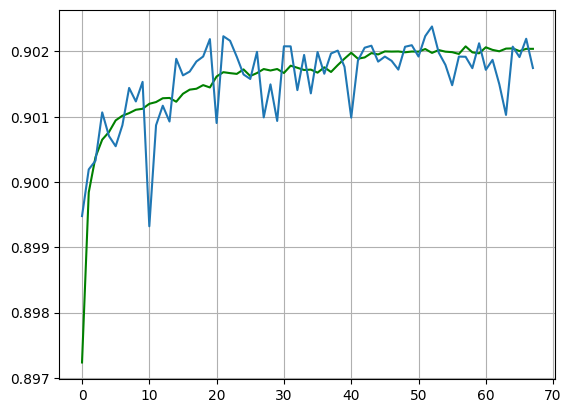

In [27]:
# строим График функции потерь
plt.plot(history_h9.history['auc'], color='green')
plt.plot(history_h9.history['val_auc'])
plt.grid(True)
plt.show()

In [26]:
# строим График функции потерь
plt.plot(history_l2.history['auc'], color='green')
plt.plot(history_l2.history['val_auc'])
plt.grid(True)
plt.show()

NameError: name 'history_l2' is not defined

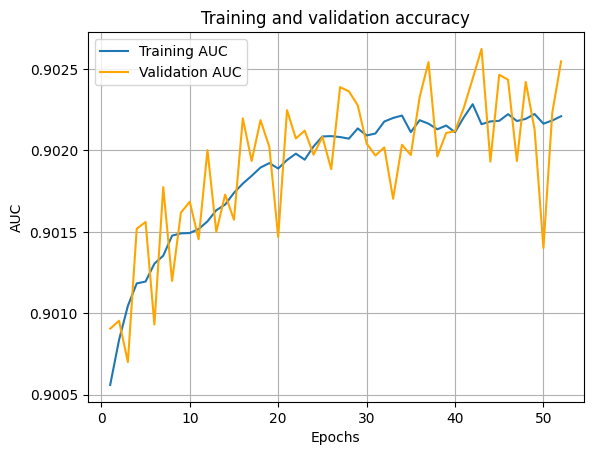

0.9026230573654175

In [88]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['auc']
val_acc = history.history['val_auc']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, label='Training AUC')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation AUC')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.grid(True)
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)

In [84]:
ce_neuro = ClassEvaluation(x_test_std, y_test, model)
ce.full_test

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

##### Kolmogorov - Arnold Theorem

In [32]:
len(X4.columns)

13

In [24]:
Nx = 12 # features
Ny = 1
Q = 3209459 # train is 0.7 of the dataset

In [26]:
lower_Nw = Ny * Q / (1 + np.log2(Q))
lower_Nw

141924.17868865846

In [28]:
upper_Nw = Ny * (Q / Nx + 1) * (Nx + Ny + 1) + Ny
upper_Nw

3744383.8333333335

In [30]:
mid_Nw = (lower_Nw + upper_Nw) / 2
mid_Nw

1943154.006010996

In [31]:
N = mid_Nw / (Nx + Ny)
N

149473.3850777689

### Models evaluation

In [22]:
X_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel
958466,3,141216875,33.1,33,42,26,16,0.380952,33,0,59,False,False
597011,2,158692713,36.3,36,44,19,25,0.568182,36,0,58,False,False
192660,1,123192970,5.7,3,5,3,2,0.400000,2,3,0,False,False
4290213,19,28764417,50.9,51,43,27,16,0.372093,50,0,66,False,False
2272738,8,14544702,38.5,39,36,19,17,0.472222,38,0,65,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857231,10,102788013,50.6,47,28,0,27,0.964286,50,50,0,False,False
2612440,9,101301658,44.6,45,26,10,16,0.615385,44,0,61,False,False
542594,2,120366941,51.2,51,26,13,13,0.500000,51,0,99,False,False
698680,2,224534796,54.5,54,34,0,34,1.000000,54,61,0,False,False


In [36]:
y_test

NameError: name 'y_test' is not defined

In [93]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics.cluster import pair_confusion_matrix

class ClassEvaluation:
    """
    Class for the evaluation of classification quality
    """
    
    def __init__(self, x_test, y_test, model, is_indel = False):
        if len(x_test) != len(y_test):
            raise ValueError("'x_test' should be the same length as 'y_test'")
        
        full_test = x_test.copy()
        full_test['is_valid'] = y_test
        full_test['prediction'] = model.predict(x_test)
        
        self.full_test: pd.DataFrame = full_test
        
        if is_indel:
            self.test_by_mutation_type = {
                'full': full_test,
                'het_indel': full_test.loc[(full_test['is_indel'] == True) & (full_test['PL_0/1'] == 0),:],
                'homo_indel': full_test.loc[(full_test['is_indel'] == True) & (full_test['PL_0/1'] != 0),:],
                'het_snp': full_test.loc[(full_test['is_indel'] == False) & (full_test['PL_0/1'] == 0),:],
                'homo_snp': full_test.loc[(full_test['is_indel'] == False) & (full_test['PL_0/1'] != 0),:],   
            }
        else:
            self.test_by_mutation_type = {
                'full': full_test,
                'het_indel': full_test.loc[(full_test['ref_alt_diff'] > 0) & (full_test['PL_0/1'] == 0),:],
                'homo_indel': full_test.loc[(full_test['ref_alt_diff'] == 0) & (full_test['PL_0/1'] != 0),:],
                'het_snp': full_test.loc[(full_test['ref_alt_diff'] > 0) & (full_test['PL_0/1'] == 0),:],
                'homo_snp': full_test.loc[(full_test['ref_alt_diff'] == 0) & (full_test['PL_0/1'] != 0),:]
            }
            
        '''
        self.het_indel_test = full_test.loc[(full_test['is_indel'] == True) & (full_test['PL_0/1'] == 0),:]
        self.homo_indel_test = full_test.loc[(full_test['is_indel'] == True) & (full_test['PL_0/1'] != 0),:]
        self.het_snp_test = full_test.loc[(X_test['is_indel'] == False) & (X_test['PL_0/1'] == 0),:]
        self.homo_snp_test = full_test.loc[(X_test['is_indel'] == False) & (X_test['PL_0/1'] != 0),:]
        '''
    
    #def filter_by_mutation_type(mutation_type: str = 'indel_het'):
    
    def calculate_metrics(self, mutation_type_filter='full', round_digits=4) -> dict:
                return {
          f'f1_score_{mutation_type_filter}': round(
              f1_score(
                  self.test_by_mutation_type[mutation_type_filter]['is_valid'],
                  self.test_by_mutation_type[mutation_type_filter]['prediction']),
              round_digits),
          f'precision_{mutation_type_filter}': round(
              precision_score(
                  self.test_by_mutation_type[mutation_type_filter]['is_valid'],
                  self.test_by_mutation_type[mutation_type_filter]['prediction']),
              round_digits),
          f'recall_{mutation_type_filter}': round(
              recall_score(
                  self.test_by_mutation_type[mutation_type_filter]['is_valid'],
                  self.test_by_mutation_type[mutation_type_filter]['prediction']),
              round_digits)
        }
    
    
    def f_score(self, beta = 1):
        return (1 + beta ** 2) * (self.precision * self.recall) / (beta ** 2 * self.precision + self.recall)

    def plot_confusion_mtrix(self, annot=True, cmap='Blues', fmt='d'):
        return sns.heatmap(self.confus_matrix, annot=annot, cmap=cmap, fmt=fmt)

    def metrics_dict(self, round_digits = 3): # should make it possible to pass metrics params via mb dict
        return {
          'jaccard_score': round(self.jaccard_score(), round_digits),
          'f_score': round(self.f_score(), round_digits),
          'fowlkes_mallows_score': round(self.fowlkes_mallows_score(), round_digits)
        }

In [88]:
ce = ClassEvaluation(X_test, y_test, forest)
ce.full_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_homopolymer,is_indel,is_valid,prediction
958466,3,141216875,33.1,33,42,26,16,0.380952,33,0,59,False,False,True,True
597011,2,158692713,36.3,36,44,19,25,0.568182,36,0,58,False,False,True,True
192660,1,123192970,5.7,3,5,3,2,0.400000,2,3,0,False,False,False,False
4290213,19,28764417,50.9,51,43,27,16,0.372093,50,0,66,False,False,True,True
2272738,8,14544702,38.5,39,36,19,17,0.472222,38,0,65,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857231,10,102788013,50.6,47,28,0,27,0.964286,50,50,0,False,False,True,True
2612440,9,101301658,44.6,45,26,10,16,0.615385,44,0,61,False,False,True,True
542594,2,120366941,51.2,51,26,13,13,0.500000,51,0,99,False,False,True,True
698680,2,224534796,54.5,54,34,0,34,1.000000,54,61,0,False,False,True,True


In [108]:
ce_no_anno = ClassEvaluation(X_test_no_anno, y_test, forest_no_anno)
ce_no_anno.full_test

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,is_indel,is_valid,prediction
958466,3,141216875,33.1,33,42,26,16,0.380952,33,0,59,False,True,True
597011,2,158692713,36.3,36,44,19,25,0.568182,36,0,58,False,True,True
192660,1,123192970,5.7,3,5,3,2,0.400000,2,3,0,False,False,False
4290213,19,28764417,50.9,51,43,27,16,0.372093,50,0,66,False,True,True
2272738,8,14544702,38.5,39,36,19,17,0.472222,38,0,65,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857231,10,102788013,50.6,47,28,0,27,0.964286,50,50,0,False,True,True
2612440,9,101301658,44.6,45,26,10,16,0.615385,44,0,61,False,True,True
542594,2,120366941,51.2,51,26,13,13,0.500000,51,0,99,False,True,True
698680,2,224534796,54.5,54,34,0,34,1.000000,54,61,0,False,True,True


In [96]:
ce.calculate_metrics()

{'f1_score_full': 0.959, 'precision_full': 0.944, 'recall_full': 0.975}

In [112]:
ce_no_anno.calculate_metrics()

{'f1_score_full': 0.957, 'precision_full': 0.941, 'recall_full': 0.973}

In [90]:
ce.calculate_metrics(mutation_type_filter='het_indel')

{'f1_score_het_indel': 0.86,
 'precision_het_indel': 0.84,
 'recall_het_indel': 0.88}

In [111]:
ce_no_anno.calculate_metrics(mutation_type_filter='het_indel')

{'f1_score_het_indel': 0.851,
 'precision_het_indel': 0.829,
 'recall_het_indel': 0.874}

In [91]:
ce.calculate_metrics(mutation_type_filter='homo_indel')

{'f1_score_homo_indel': 0.879,
 'precision_homo_indel': 0.847,
 'recall_homo_indel': 0.913}

In [113]:
ce_no_anno.calculate_metrics(mutation_type_filter='homo_indel')

{'f1_score_homo_indel': 0.863,
 'precision_homo_indel': 0.838,
 'recall_homo_indel': 0.891}

In [92]:
ce.calculate_metrics(mutation_type_filter='het_snp')

{'f1_score_het_snp': 0.975,
 'precision_het_snp': 0.961,
 'recall_het_snp': 0.989}

In [114]:
ce_no_anno.calculate_metrics(mutation_type_filter='het_snp')

{'f1_score_het_snp': 0.974,
 'precision_het_snp': 0.959,
 'recall_het_snp': 0.989}

In [93]:
ce.calculate_metrics(mutation_type_filter='homo_snp')

{'f1_score_homo_snp': 0.972,
 'precision_homo_snp': 0.959,
 'recall_homo_snp': 0.985}

In [115]:
ce_no_anno.calculate_metrics(mutation_type_filter='homo_snp')

{'f1_score_homo_snp': 0.972,
 'precision_homo_snp': 0.959,
 'recall_homo_snp': 0.985}

In [64]:
ce_indel_len = ClassEvaluation(X_test, y_test, forest_def_indel_len)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- is_indel


In [38]:
ce_indel_len.calculate_metrics()

{'f1_score_full': 0.96, 'precision_full': 0.945, 'recall_full': 0.975}

ce_indel_lenave objects

In [ ]:
pt_full.to_csv('pt_full.csv')
!gzip pt_full.csv
!cp pt_full.csv.gz /content/drive/MyDrive/BTC/data/vcf_csv/

In [ ]:
x_df.to_csv('x_df_full.csv')
!gzip x_df_full.csv
!cp x_df_full.csv.gz /content/drive/MyDrive/BTC/data/vcf_csv/

In [ ]:
!gzip vcf_tsv/*

In [ ]:
!cp -r vcf_tsv/ /content/drive/MyDrive/BTC/data/

In [ ]:
!gzip -k /content/dv_no_homo_default_intersect.vcf

In [ ]:
!cp /content/dv_no_homo_default_intersect.vcf.gz /content/drive/MyDrive/BTC/data/vcf/processed/

## Save models

In [103]:
models_dir = '/content/drive/MyDrive/BTC/data/models'
local_models_dir = '/home/skomlev/data/models'

In [ ]:
dump(forest, 'forest_def_hetero_indel.joblib')

['forest_def_hetero_indel.joblib']

In [ ]:
!cp forest_def_hetero_indel.joblib $models_dir/forest_def_hetero_indel.joblib

In [100]:
filename = 'forest_def_no_anno.sav'
pickle.dump(forest_no_anno, open(filename, 'wb'))

In [102]:
!gzip $filename

In [107]:
!mv /home/skomlev/code/forest_def_no_anno.sav.gz $local_models_dir

In [101]:
!ls -lh

total 3.7G
-rw-rw-r-- 1 skomlev skomlev 719K Mar  2 01:14 deep_var_opt_local.ipynb
-rw-rw-r-- 1 skomlev skomlev 3.7G Mar  2 01:14 forest_def_no_anno.sav
-rw-rw-r-- 1 skomlev skomlev   72 Mar  1 12:37 Untitled.ipynb
-rw-rw-r-- 1 skomlev skomlev 165K Mar  1 12:40 Выборы_Мэра_Графики.ipynb


# Neuro Course

### Train/Test Split for NeuroSim

In [ ]:
x_df

,class,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1
0,False,1,28588,3.9,3,23,16,6,0.260870,1,0,10
1,False,1,98999,20.4,17,39,14,24,0.615385,20,0,18
2,False,1,99092,10.2,10,41,21,6,0.146341,9,0,34
3,False,1,108545,16.2,16,31,22,9,0.290323,16,0,24
4,False,1,109575,5.9,6,16,11,5,0.312500,4,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
493581,False,22,50780397,31.2,30,39,14,25,0.641026,31,0,37
493582,True,22,50781400,23.8,24,21,14,4,0.190476,23,0,50
493583,True,22,50786264,34.3,33,12,3,9,0.750000,34,0,40
493584,True,22,50791171,10.6,11,29,16,11,0.379310,10,0,29


In [ ]:
x_df.to_csv('komlev_data.csv')

In [ ]:
x_mini = x_df.iloc[0:100000,:]
x_mini['id'] = x_mini.index
x_mini

<ipython-input-53-e3a54ee71833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_mini['id'] = x_mini.index


,class,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,id
0,False,1,28588,3.9,3,23,16,6,0.260870,1,0,10,0
1,False,1,98999,20.4,17,39,14,24,0.615385,20,0,18,1
2,False,1,99092,10.2,10,41,21,6,0.146341,9,0,34,2
3,False,1,108545,16.2,16,31,22,9,0.290323,16,0,24,3
4,False,1,109575,5.9,6,16,11,5,0.312500,4,0,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,3,131812220,27.2,27,33,14,16,0.484848,27,0,40,99995
99996,True,3,131826198,51.3,51,37,17,20,0.540541,51,0,66,99996
99997,True,3,131838629,43.2,43,25,11,14,0.560000,43,0,60,99997
99998,True,3,131842730,50.9,51,29,15,14,0.482759,50,0,63,99998


In [ ]:
train = x_mini.sample(frac=0.7, random_state=17)
test = x_mini[~x_mini['id'].isin(list(train.id))]
len(train) / len(x_mini)

0.7